# Analyzing Crime in LA

## 🌇🚔 Background

![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs!

However, as with any highely populated city, it isn't always glamarous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing their crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

You are free to use any methodologies that you like in order to produce your insights. 

# The Data

They have provided you with a single dataset to use. A summary and preview is provided below.

The data is publicly available [here](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8).

## 👮‍♀️ crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24 hour military time. |
| `'AREA'` | The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Rpt Dist No'` | A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74ab |
| `'Crm Cd'` | Crime code for the offence committed. |
| `'Crm Cd Desc'` | Definition of the crime. |
| `'Vict Age'` | Victim Age (years) |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Premis Cd'` | Code for the type of structure, vehicle, or location where the crime took place. |
| `'Premis Desc'` | Definition of the `'Premis Cd'`. |
| `'Weapon Used Cd'` | The type of weapon used in the crime. |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'Crm Cd 1'` | Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious. |
| `'Crm Cd 2'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'Crm Cd 3'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'Crm Cd 4'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'LOCATION'` | Street address of the crime. |
| `'Cross Street'` | Cross Street of rounded Address |
| `'LAT'` | Latitude of the crime location. |
| `'LON'` | Longtitude of the crime location. |

## 💪 The Challenge

* Use your skills to produce insights about crimes in Los Angeles.
* Examples could include examining how crime varies by area, crime type, victim age, time of day, and victim descent.
* You could build machine learning models to predict criminal activities, such as when a crime may occur, what type of crime, or where, based on features in the dataset.
* You may also wish to visualize the distribution of crimes on a map.

# **II. DATA WRANGLING** *(preparing data for analysis)* 

# **1. Data Discovery** *(exploring and assessing data quality)* 







## 2.1 Imports and configuration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import datetime as dt

## 2.1 Dataset overview  

In [3]:
crimes = pd.read_csv("data/crimes.csv", parse_dates=['Date Rptd', 'DATE OCC'])
crimes.head()

/tmp/ipykernel_28712/1741409795.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes = pd.read_csv("data/crimes.csv", parse_dates=['Date Rptd', 'DATE OCC'])


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,201223780,2020-11-02,2020-11-02,1120,12,77th Street,1256,210,ROBBERY,65,...,FOLDING KNIFE,Invest Cont,210.0,NaN,NaN,NaN,73RD ST,FIGUEROA ST,33.9737,-118.2827
1,201911283,2020-06-23,2020-06-23,315,19,Mission,1958,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51,...,NaN,Invest Cont,740.0,998.0,NaN,NaN,9700 WOODMAN AV,NaN,34.2467,-118.4479
2,200806654,2020-02-28,2020-02-28,1545,8,West LA,885,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),38,...,NaN,Invest Cont,420.0,NaN,NaN,NaN,10400 W PICO BL,NaN,34.0463,-118.4171
3,220912167,2022-08-03,2022-07-26,1730,9,Van Nuys,955,901,VIOLATION OF RESTRAINING ORDER,64,...,NaN,Adult Other,901.0,NaN,NaN,NaN,14200 MAGNOLIA BL,NaN,34.1668,-118.4445
4,200817110,2020-12-02,2020-11-27,1500,8,West LA,802,662,"BUNCO, GRAND THEFT",73,...,NaN,Invest Cont,662.0,NaN,NaN,NaN,15000 W SUNSET BL,NaN,34.0889,-118.5325


## 2.2 Number of records and columns

In [4]:
print(f"\nCrimes - number of records {crimes.shape[0]}, number of columns {crimes.shape[1]}")


Crimes - number of records 400146, number of columns 25


## 2.3 Data types and interpretation

In [5]:
print(f"\n{'='*50}") 
print(f"🔍 Crimes")
print(f"{'='*50}")
print(f"{crimes.info()}\n")


🔍 Crimes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400146 entries, 0 to 400145
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           400146 non-null  int64         
 1   Date Rptd       400146 non-null  datetime64[ns]
 2   DATE OCC        400146 non-null  datetime64[ns]
 3   TIME OCC        400146 non-null  int64         
 4   AREA            400146 non-null  int64         
 5   AREA NAME       400146 non-null  object        
 6   Rpt Dist No     400146 non-null  int64         
 7   Crm Cd          400146 non-null  int64         
 8   Crm Cd Desc     400146 non-null  object        
 9   Vict Age        400146 non-null  int64         
 10  Vict Sex        346271 non-null  object        
 11  Vict Descent    346268 non-null  object        
 12  Premis Cd       400140 non-null  float64       
 13  Premis Desc     399910 non-null  object        
 14  Weapon Used Cd  136027 non

### Categorize the features into numerical and categorical types for further analysis

In [6]:
numeric_features = crimes.select_dtypes(include='number').columns.to_list()
categorical_features = crimes.select_dtypes(include='object').columns.to_list()

print('>> Numerical Features \n', numeric_features, '\n')
print('>> Categorical Features \n', categorical_features, '\n')

>> Numerical Features 
 ['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Crm Cd', 'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON'] 

>> Categorical Features 
 ['AREA NAME', 'Crm Cd Desc', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status Desc', 'LOCATION', 'Cross Street'] 



## 2.4 Unique Values 

In [7]:
def check_unique_values(dataset, dataset_name):
    print(f"\n{'='*50}")
    print(f"🔍 Unique Values Report for: {dataset_name}")
    print(f"{'='*50}")

    unique_values = dataset.apply(lambda x: x.nunique())
    print("\nNumber of unique values per column:")
    print(unique_values)

    object_columns = dataset.select_dtypes(include=['object']).columns
    for col in object_columns:
        print(f"\nUnique values in column '{col}':")
        print(dataset[col].unique())

check_unique_values(crimes, 'Crimes')


🔍 Unique Values Report for: Crimes

Number of unique values per column:
DR_NO             400146
Date Rptd           1280
DATE OCC            1280
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1171
Crm Cd               112
Crm Cd Desc          112
Vict Age             102
Vict Sex               4
Vict Descent          20
Premis Cd            305
Premis Desc          302
Weapon Used Cd        77
Weapon Desc           77
Status Desc            6
Crm Cd 1             119
Crm Cd 2             102
Crm Cd 3              27
Crm Cd 4               0
LOCATION           53316
Cross Street        7253
LAT                 5228
LON                 4891
dtype: int64

Unique values in column 'AREA NAME':
['77th Street' 'Mission' 'West LA' 'Van Nuys' 'Devonshire' 'Topanga'
 'Central' 'Rampart' 'Foothill' 'West Valley' 'Southeast' 'Newton'
 'Olympic' 'Southwest' 'Pacific' 'Hollenbeck' 'Northeast' 'Wilshire'
 'N Hollywood' 'Hollywood' 'Harbor']

Unique v

- `Vict Sex` contains ['F' 'M' nan 'X' 'H'] values. 
  - should be 'F', 'M', 'X'
- `Vict Descent` contains ['-' , nan] if value is unknown should be `X`
- `Premis Desc` contains [nan]
- `Weapon Desc` contains [nan]

## 2.5 Missing values  

In [8]:
total = crimes.isnull().sum().sort_values(ascending=False)
percent = crimes.isnull().mean() * 100

result = pd.concat([total, round(percent, 2)], axis=1, keys=['Total', 'Percent'])
result[result['Total'] > 0]

,Total,Percent
Crm Cd 4,400146,100.00
Crm Cd 3,399348,99.80
Crm Cd 2,372025,92.97
Cross Street,335564,83.86
Weapon Used Cd,264119,66.01
Weapon Desc,264119,66.01
Vict Descent,53878,13.46
Vict Sex,53875,13.46
Premis Desc,236,0.06
Premis Cd,6,0.00


In [9]:
def plot_missing_values(dataset, dataset_name):
    percent = dataset.isnull().mean() * 100
    missing_df = pd.DataFrame({'column': percent.index, 'missing_ratio': percent.values})

    plt.figure(figsize=(15, 6))
    plt.grid(True)
    ax = sns.barplot(x='column', y='missing_ratio', data=missing_df[missing_df['missing_ratio'] > 0], color='#ac1106')
        
    plt.xticks(rotation=45, ha='right', fontsize = 14)
    plt.xlabel('')
        
    plt.title(f"Missing Data in {dataset_name}", fontsize = 20)
        
    plt.yticks(range(0, 41, 10), fontsize = 14)
    plt.ylabel('Missing Values ratio(%)', fontsize = 12)
        
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.8,
                '{:.1f}%'.format(height),
                ha="center")
        
    plt.tight_layout()
    plt.show()


def report_missing_data(dataset, dataset_name, plot_missing_vals=False):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = dataset.isnull().mean() * 100
    
    result = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    print(f"🔴 Missing Data Report for: {dataset_name}")
    print(f"{'-'*50}")

    print(result[result['Percent'] > 0])

    if plot_missing_vals:
        if dataset.isnull().sum().sum() != 0:
            print(f"\n⚠️ Missing Data Matrix for: {dataset_name}")
            plt.figure(figsize=(10, 5))  
            msno.matrix(dataset)
            plt.title(f"Missing Data in {dataset_name}", fontsize=14) 
            plt.show()

            plot_missing_values(dataset, dataset_name)

🔴 Missing Data Report for: LA Crimes
--------------------------------------------------
                 Total     Percent
Crm Cd 4        400146  100.000000
Crm Cd 3        399348   99.800573
Crm Cd 2        372025   92.972315
Cross Street    335564   83.860391
Weapon Used Cd  264119   66.005658
Weapon Desc     264119   66.005658
Vict Descent     53878   13.464585
Vict Sex         53875   13.463836
Premis Desc        236    0.058978
Premis Cd            6    0.001499
Crm Cd 1             6    0.001499

⚠️ Missing Data Matrix for: LA Crimes


<Figure size 1000x500 with 0 Axes>

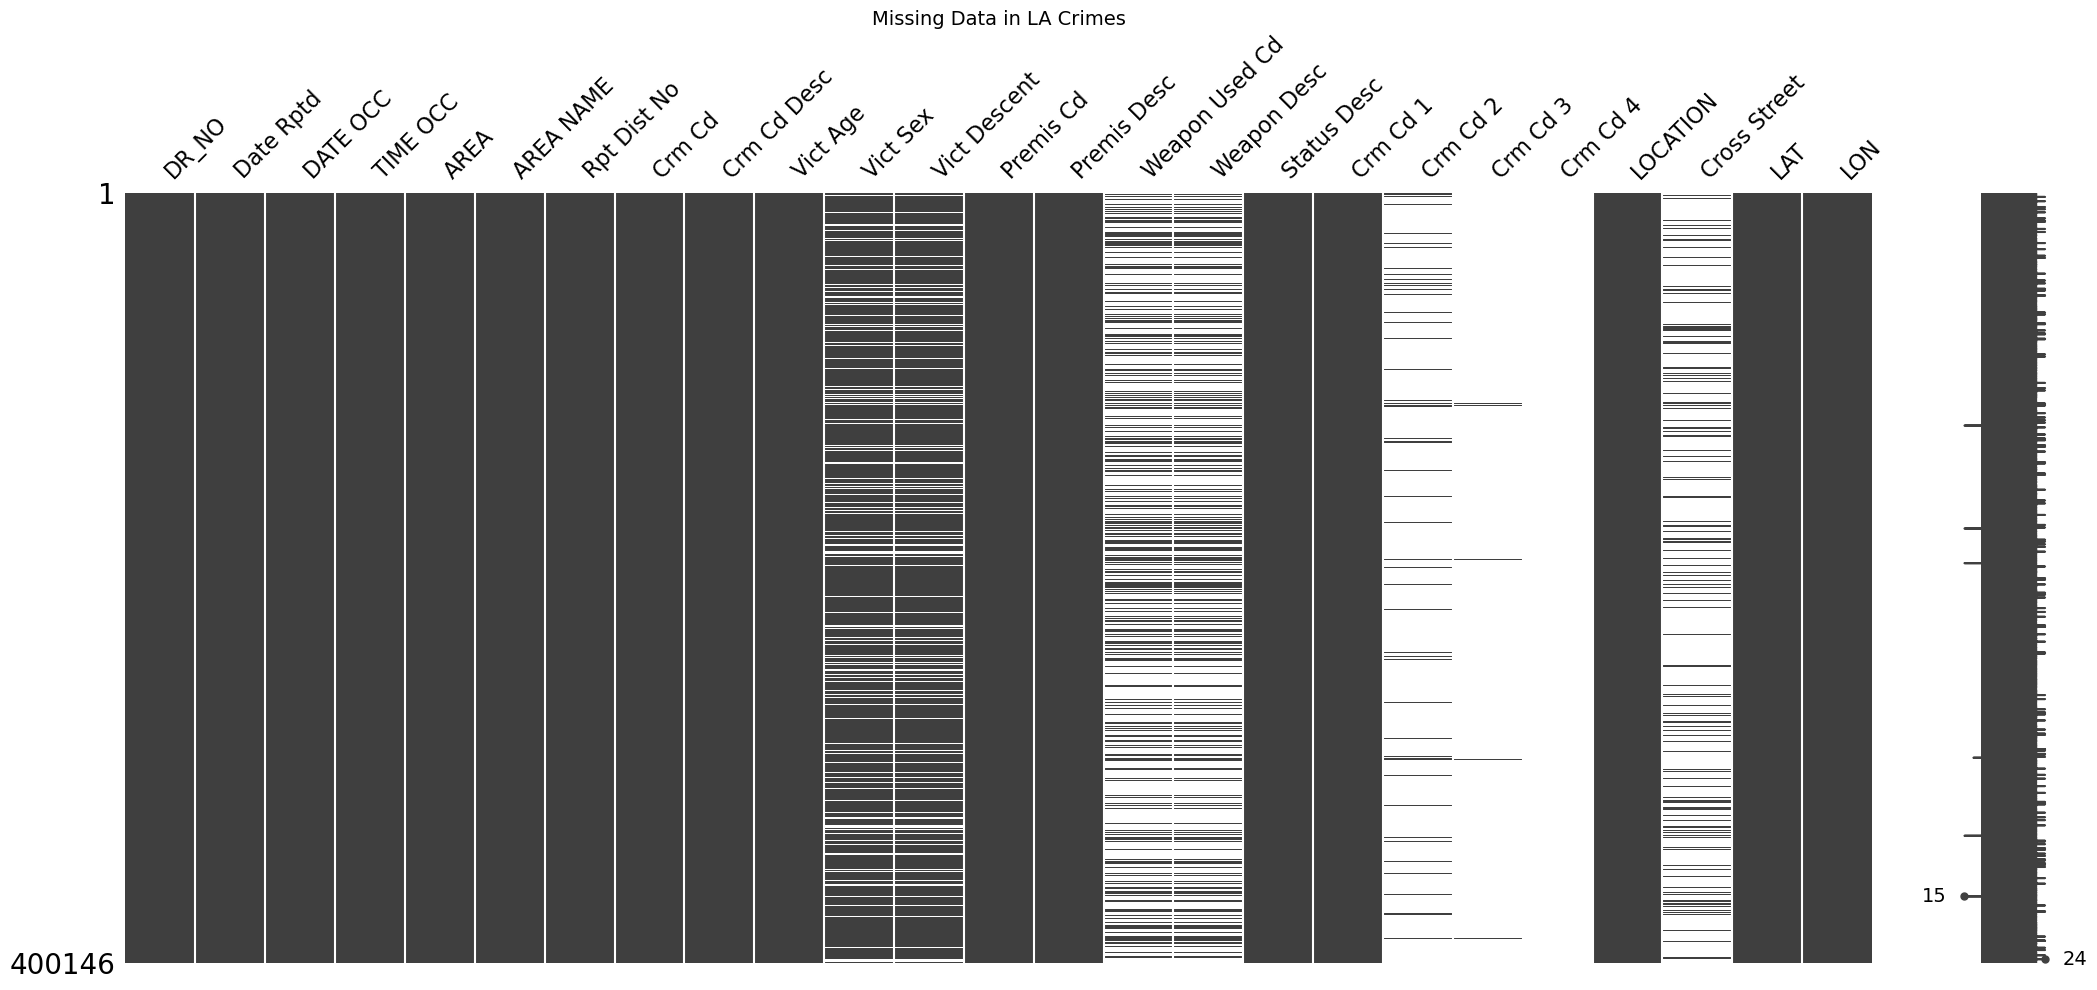

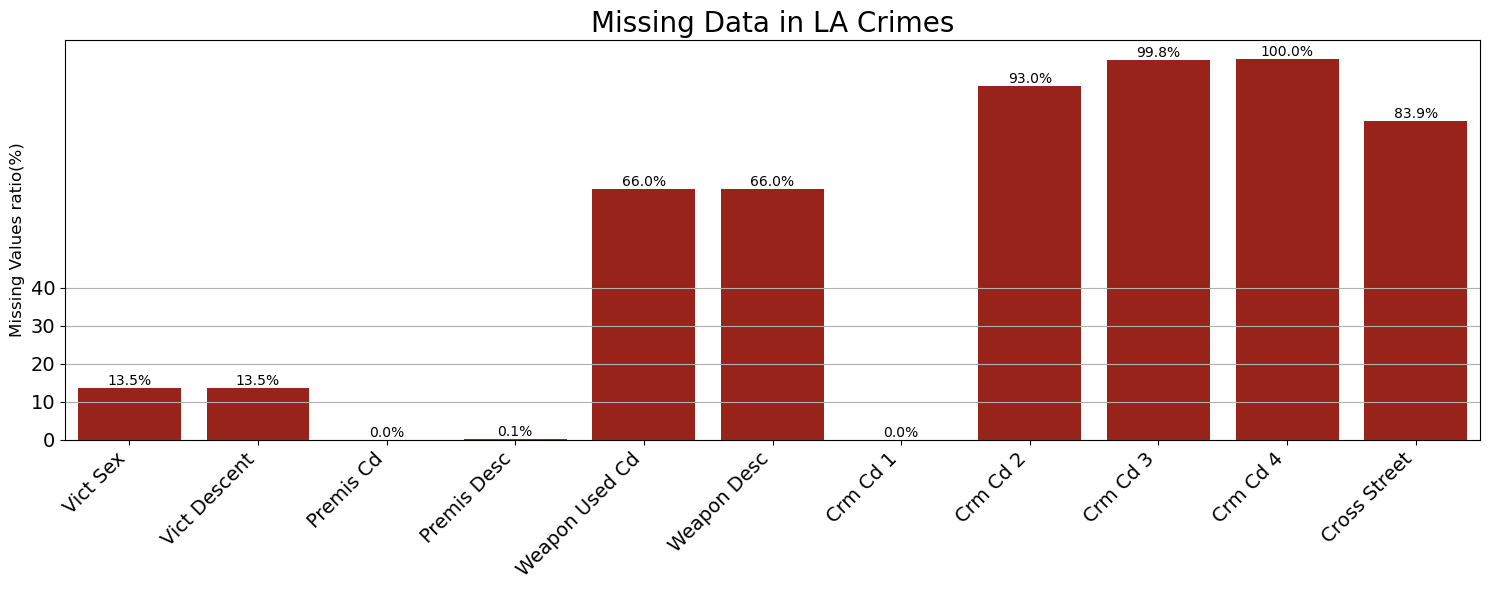

In [10]:
report_missing_data(crimes, 'LA Crimes', plot_missing_vals=True)

- First 10 columns which contained the most important information, don't seem to have any missing data as of now. But i need to further investigate this to be sure.
- The seems to be a relationship between missing data in vict_sex and vict_discent columns, which means missing data here is MNAR or the victim refused to disclose that information.
- Same could be said about the weapon used and weapon description columns. Obviously if you don't have (maybe no weapon was used of confiscated) the weapon used you can't describe it. So i will use the weapon code to map it to the descripton to obtain a more readable results instead of plain code.
- Too much missing data in the Cm Cd1, 2, 3 and cross street columns, might as well drop them.
but first we need to inspect those columns.

## 2.6 Duplicates

In [11]:
def check_duplicates(dataset, dataset_name):
    print(f"\n{'='*50}")
    print(f"🔍 Duplicate Values Report for: {dataset_name}")
    print(f"{'='*50}")
    
    total_duplicates = dataset.duplicated().sum()  # Liczba zduplikowanych wierszy
    print(f"\nTotal number of duplicate rows: {total_duplicates}")
    
    if total_duplicates > 0:
        print("\nDuplicate rows in the dataset:")
        print(dataset[dataset.duplicated()])
    
    print(f"\nChecking duplicates in each column:")
    for col in dataset.columns:
        duplicate_values = dataset[col].duplicated().sum()
        print(f"Column '{col}' has {duplicate_values} duplicate values")
    
    print(f"{'='*50}\n")


check_duplicates(crimes, 'LA Crimes')


🔍 Duplicate Values Report for: LA Crimes

Total number of duplicate rows: 0

Checking duplicates in each column:
Column 'DR_NO' has 0 duplicate values
Column 'Date Rptd' has 398866 duplicate values
Column 'DATE OCC' has 398866 duplicate values
Column 'TIME OCC' has 398707 duplicate values
Column 'AREA' has 400125 duplicate values
Column 'AREA NAME' has 400125 duplicate values
Column 'Rpt Dist No' has 398975 duplicate values
Column 'Crm Cd' has 400034 duplicate values
Column 'Crm Cd Desc' has 400034 duplicate values
Column 'Vict Age' has 400044 duplicate values
Column 'Vict Sex' has 400141 duplicate values
Column 'Vict Descent' has 400125 duplicate values
Column 'Premis Cd' has 399840 duplicate values
Column 'Premis Desc' has 399843 duplicate values
Column 'Weapon Used Cd' has 400068 duplicate values
Column 'Weapon Desc' has 400068 duplicate values
Column 'Status Desc' has 400140 duplicate values
Column 'Crm Cd 1' has 400026 duplicate values
Column 'Crm Cd 2' has 400043 duplicate value

## 2.8 Outliers

In [12]:
from scipy.stats import zscore


def check_outliers(dataset, dataset_name):
    print(f"\n{'='*50}")
    print(f"🔍 Outliers Report for: {dataset_name}")
    print(f"{'='*50}")
    
    # Sprawdzenie dla zmiennych numerycznych
    numerical_cols = dataset.select_dtypes(include=[np.number]).columns
    
    for col in numerical_cols:
        print(f"\nChecking outliers in column: {col}")
        
        # 1. Wykres pudełkowy
        plt.figure(figsize=(8,6))
        sns.boxplot(x=dataset[col], color='skyblue')
        plt.title(f"Boxplot of {col}")
        plt.show()

        # 2. Zidentyfikowanie wartości odstających przy użyciu IQR
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Wartości odstające według IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
        
        print(f"\nOutliers based on IQR (<= {lower_bound} or >= {upper_bound}):")
        print(outliers_iqr[[col]])
        
        # 3. Z-score: Używamy Z-score do znalezienia wartości odstających
        col_data = dataset[col].dropna()  # Usuwamy NaN przed obliczeniem z-score
        z_scores = zscore(col_data)
        
        # Tworzymy maskę logiczną na podstawie z-score
        outliers_mask = np.abs(z_scores) > 3
        outliers_zscore = col_data[outliers_mask]
        
        print(f"\nOutliers based on Z-score (Z-score > 3 or < -3):")
        print(outliers_zscore)  # Wyświetlamy bez indeksowania

    print(f"{'='*50}\n")


# check_outliers(crimes, 'LA Crimes')



# **2 Cleaning** *(data cleaning process)* 

## 2.1 Cleaning data

### 2.1.1 Standardizing column names and values 

In [13]:
def check_column_names(dataset, dataset_name):
    print(f"\n{'='*50}")
    print(f"🔍 Column Name Check for: {dataset_name}")
    print(f"{'='*50}")
    
    # 1. Sprawdzenie obecności spacji w nazwach kolumn
    original_columns = dataset.columns
    print(f"\nOriginal column names: {original_columns.tolist()}")
    
    # 2. Usuwanie spacji i zamiana na małe litery
    clean_columns = [col.strip().lower().replace(' ', '_') for col in original_columns]
    dataset.columns = clean_columns
    
    print(f"\nCleaned column names: {dataset.columns.tolist()}")
    
    # 3. Sprawdzanie duplikatów w nazwach kolumn
    duplicate_columns = dataset.columns[dataset.columns.duplicated()]
    
    if len(duplicate_columns) > 0:
        print(f"\nDuplicate columns found: {duplicate_columns.tolist()}")
    else:
        print("\nNo duplicate columns found.")
    
    print(f"{'='*50}\n")


check_column_names(crimes, 'LA Crimes')


🔍 Column Name Check for: LA Crimes

Original column names: ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']

Cleaned column names: ['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name', 'rpt_dist_no', 'crm_cd', 'crm_cd_desc', 'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'weapon_used_cd', 'weapon_desc', 'status_desc', 'crm_cd_1', 'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat', 'lon']

No duplicate columns found.



### 2.1.3 Handling missing values (imputation or removal)  

In [14]:
report_missing_data(crimes, 'LA Crimes', plot_missing_vals=False)

🔴 Missing Data Report for: LA Crimes
--------------------------------------------------
                 Total     Percent
crm_cd_4        400146  100.000000
crm_cd_3        399348   99.800573
crm_cd_2        372025   92.972315
cross_street    335564   83.860391
weapon_used_cd  264119   66.005658
weapon_desc     264119   66.005658
vict_descent     53878   13.464585
vict_sex         53875   13.463836
premis_desc        236    0.058978
premis_cd            6    0.001499
crm_cd_1             6    0.001499


Since there are columns in the set that have values ​​above 80%, I decided to remove them.

In [15]:
df_cleaned = crimes.dropna(axis=1, thresh=0.3 * len(crimes))
report_missing_data(df_cleaned, 'LA Crimes', plot_missing_vals=False)



🔴 Missing Data Report for: LA Crimes
--------------------------------------------------
                 Total    Percent
weapon_desc     264119  66.005658
weapon_used_cd  264119  66.005658
vict_descent     53878  13.464585
vict_sex         53875  13.463836
premis_desc        236   0.058978
crm_cd_1             6   0.001499
premis_cd            6   0.001499


**Unique values ​​in column 'Vict Sex':**
['F' 'M' nan 'X' 'H'], where `nan` and `H` will be replaced with `X` which represents `Unknown`

**Unique values ​​in column 'Vict Descent':**
['H' 'O' 'W' nan 'B' 'X' 'A' 'I' 'J' 'K' 'F' 'V' 'C' 'Z' 'P' 'S' 'U' 'L' 'D' 'G' '-'], where `-` and `nan` will be replaced with `X` which represents `Unknown`

In [16]:
from sklearn.impute import SimpleImputer


def cleaning_data(df):
    df_cleaned = df.replace(['H', '-'], np.nan)
    missing_label_imputer = SimpleImputer(strategy='constant', fill_value='X')

    df_cleaned[['vict_sex', 'vict_descent']] = missing_label_imputer.fit_transform(df_cleaned[['vict_sex', 'vict_descent']])

    return df_cleaned

df_crimes_without_nulls = cleaning_data(df_cleaned)

print(f'Unique values for Vict Sex column {df_crimes_without_nulls['vict_sex'].unique()}')
print(f'Unique values for Vict Descent column {df_crimes_without_nulls['vict_descent'].unique()}')

report_missing_data(df_crimes_without_nulls, 'Cleaned Crimes')

Unique values for Vict Sex column ['F' 'M' 'X']
Unique values for Vict Descent column ['X' 'O' 'W' 'B' 'A' 'I' 'J' 'K' 'F' 'V' 'C' 'Z' 'P' 'S' 'U' 'L' 'D' 'G']
🔴 Missing Data Report for: Cleaned Crimes
--------------------------------------------------
                 Total    Percent
weapon_desc     264119  66.005658
weapon_used_cd  264119  66.005658
premis_desc        236   0.058978
crm_cd_1             6   0.001499
premis_cd            6   0.001499


In case weapon_desc we can use `UNKNOWN FIREARM` to fill missing values and `000` for `weapon_used_cd`

In [17]:
df_crimes_without_nulls['weapon_used_cd'].unique()

array([204.,  nan, 400., 500., 306., 109., 512., 102., 312., 302., 218.,
       511., 310., 307., 212., 106., 209., 201., 104., 506., 311., 308.,
       515., 113., 215., 107., 205., 200., 207., 304., 301., 223., 101.,
       309., 114., 110., 216., 103., 214., 122., 513., 221., 217., 505.,
       208., 504., 211., 210., 219., 206., 514., 303., 510., 305., 115.,
       112., 516., 503., 501., 203., 509., 213., 111., 507., 220., 108.,
       105., 118., 120., 125., 502., 117., 119., 508., 202., 116., 300.,
       123.])

In [18]:
from sklearn.impute import SimpleImputer

# Imputer for weapon_desc (tekst)
missing_label_imputer_weapon_describe = SimpleImputer(strategy='constant', fill_value='UNKNOWN FIREARM')

df_crimes_without_nulls['weapon_desc'] = missing_label_imputer_weapon_describe.fit_transform(
    df_crimes_without_nulls[['weapon_desc']]
).ravel()  # <-- to 1D

# Imputer for weapon_used_cd 
missing_label_imputer_weapon_used_cd = SimpleImputer(strategy='constant', fill_value=999)

df_crimes_without_nulls['weapon_used_cd'] = missing_label_imputer_weapon_used_cd.fit_transform(
    df_crimes_without_nulls[['weapon_used_cd']]
).ravel()  # <-- to 1D


df_crimes_without_nulls['weapon_used_cd'].unique()

array([204., 999., 400., 500., 306., 109., 512., 102., 312., 302., 218.,
       511., 310., 307., 212., 106., 209., 201., 104., 506., 311., 308.,
       515., 113., 215., 107., 205., 200., 207., 304., 301., 223., 101.,
       309., 114., 110., 216., 103., 214., 122., 513., 221., 217., 505.,
       208., 504., 211., 210., 219., 206., 514., 303., 510., 305., 115.,
       112., 516., 503., 501., 203., 509., 213., 111., 507., 220., 108.,
       105., 118., 120., 125., 502., 117., 119., 508., 202., 116., 300.,
       123.])

In [19]:
report_missing_data(df_crimes_without_nulls, 'Cleaned Crimes')

🔴 Missing Data Report for: Cleaned Crimes
--------------------------------------------------
             Total   Percent
premis_desc    236  0.058978
crm_cd_1         6  0.001499
premis_cd        6  0.001499


In [20]:
df_crimes_without_nulls.dropna(subset=['crm_cd_1', 'premis_cd'], inplace=True)

In [21]:
df_crimes_without_nulls['premis_desc'].unique()

array(['SIDEWALK', 'RESTAURANT/FAST FOOD', 'PARKING LOT',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
       'SINGLE FAMILY DWELLING', 'STREET', 'MARKET',
       'LA UNION STATION (NOT LINE SPECIFIC)', 'MTA BUS',
       'VEHICLE, PASSENGER/TRUCK', 'OTHER BUSINESS', 'CYBERSPACE',
       'AUTO REPAIR SHOP', 'OTHER/OUTSIDE', 'GARAGE/CARPORT',
       'DEPARTMENT STORE', 'OTHER PREMISE', 'PARK/PLAYGROUND', 'HOTEL',
       'MEMBERSHIP STORE (COSTCO,SAMS CLUB)*', 'BAR/COCKTAIL/NIGHTCLUB',
       'DRIVEWAY', 'LIQUOR STORE', 'PARKING UNDERGROUND/BUILDING',
       'YARD (RESIDENTIAL/BUSINESS)', 'NIGHT CLUB (OPEN EVENINGS ONLY)',
       'MINI-MART', 'AUTOMATED TELLER MACHINE (ATM)',
       "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS",
       'ELEMENTARY SCHOOL', 'ALLEY', 'CLOTHING STORE', 'DAY CARE/ADULTS*',
       'BEAUTY SUPPLY STORE',
       'AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)',
       'NURSING/CONVALESCENT/RETIREMENT HOME', 'PATIO*',
       'CELL PHONE STORE', 'DR

In [22]:
missing_label_imputer_premis = SimpleImputer(strategy='constant', fill_value='UNKNOWN PREMIS')

df_crimes_without_nulls['premis_desc'] = missing_label_imputer_premis.fit_transform(
    df_crimes_without_nulls[['premis_desc']]
).ravel()

report_missing_data(df_crimes_without_nulls, 'Cleaned Crimes')

🔴 Missing Data Report for: Cleaned Crimes
--------------------------------------------------
Empty DataFrame
Columns: [Total, Percent]
Index: []


# **4.3 Transformation** *(data transformation steps)*  

In [23]:
df_crimes_without_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400134 entries, 0 to 400145
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dr_no           400134 non-null  int64         
 1   date_rptd       400134 non-null  datetime64[ns]
 2   date_occ        400134 non-null  datetime64[ns]
 3   time_occ        400134 non-null  int64         
 4   area            400134 non-null  int64         
 5   area_name       400134 non-null  object        
 6   rpt_dist_no     400134 non-null  int64         
 7   crm_cd          400134 non-null  int64         
 8   crm_cd_desc     400134 non-null  object        
 9   vict_age        400134 non-null  int64         
 10  vict_sex        400134 non-null  object        
 11  vict_descent    400134 non-null  object        
 12  premis_cd       400134 non-null  float64       
 13  premis_desc     400134 non-null  object        
 14  weapon_used_cd  400134 non-null  float64 

Time occ is formated in 24 hour military time. In order to use this in later analysis, I will use datetime to extract the hour to the new column. 

In [24]:
df_crimes_without_nulls['Hour'] = pd.to_datetime(
    df_crimes_without_nulls['time_occ'].astype(str).str.zfill(4),  # Add a leading zero
    format='%H%M'
).dt.hour
df_crimes_without_nulls.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,vict_age,...,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status_desc,crm_cd_1,location,lat,lon,Hour
0,201223780,2020-11-02,2020-11-02,1120,12,77th Street,1256,210,ROBBERY,65,...,102.0,SIDEWALK,204.0,FOLDING KNIFE,Invest Cont,210.0,73RD ST,33.9737,-118.2827,11
1,201911283,2020-06-23,2020-06-23,315,19,Mission,1958,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51,...,210.0,RESTAURANT/FAST FOOD,999.0,UNKNOWN FIREARM,Invest Cont,740.0,9700 WOODMAN AV,34.2467,-118.4479,3
2,200806654,2020-02-28,2020-02-28,1545,8,West LA,885,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),38,...,108.0,PARKING LOT,999.0,UNKNOWN FIREARM,Invest Cont,420.0,10400 W PICO BL,34.0463,-118.4171,15
3,220912167,2022-08-03,2022-07-26,1730,9,Van Nuys,955,901,VIOLATION OF RESTRAINING ORDER,64,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",999.0,UNKNOWN FIREARM,Adult Other,901.0,14200 MAGNOLIA BL,34.1668,-118.4445,17
4,200817110,2020-12-02,2020-11-27,1500,8,West LA,802,662,"BUNCO, GRAND THEFT",73,...,501.0,SINGLE FAMILY DWELLING,999.0,UNKNOWN FIREARM,Invest Cont,662.0,15000 W SUNSET BL,34.0889,-118.5325,15


We can create new colum called severity, which will contain values from the Crm Cd Desc column on whether the crime was an attempt, felony or Grand. I'll use information from google to come up with this classification.

In [25]:
# Create a mapping of cleaned severity
severity_mapping = {
 'ROBBERY':'Felony',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)':'Felony',
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)':'Petty',
 'VIOLATION OF RESTRAINING ORDER':'Unknown',
 'BUNCO, GRAND THEFT':'Grand Theft',
 'THEFT OF IDENTITY':'Felony',
 'BURGLARY FROM VEHICLE':'Felony',
 'INTIMATE PARTNER - SIMPLE ASSAULT':'Simple Assault',
 'BATTERY - SIMPLE ASSAULT':'Simple Assault',
 'CRIMINAL THREATS - NO WEAPON DISPLAYED':'Felony',
 'BURGLARY':'Felony',
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD':'Grand Theft',
 'VIOLATION OF TEMPORARY RESTRAINING ORDER':'Unknown',
 'TRESPASSING':'Misdemeanor',
 'BIKE - STOLEN':'Petty',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT':'Aggravated Assault',
 'CONTEMPT OF COURT':'Misdemeanor',
 'THEFT PLAIN - PETTY ($950 & UNDER)':'Petty',
 'SHOTS FIRED AT INHABITED DWELLING':'Felony',
 'INTIMATE PARTNER - AGGRAVATED ASSAULT':'Aggravated Assault',
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)':'Grand Theft',
 'DISCHARGE FIREARMS/SHOTS FIRED':'Felony',
 'ATTEMPTED ROBBERY':'Attempted',
 'BURGLARY, ATTEMPTED':'Attempted',
 'PICKPOCKET':'Petty',
 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)':'Grand Theft',
 'OTHER MISCELLANEOUS CRIME':'Unknown',
 'OTHER ASSAULT':'Unknown',
 'BRANDISH WEAPON':'Felony',
 'VIOLATION OF COURT ORDER':'Misdemeanor',
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)':'Misdemeanor',
 'VEHICLE - ATTEMPT STOLEN':'Attempted',
 'CRUELTY TO ANIMALS':'Unknown',
 'THREATENING PHONE CALLS/LETTERS':'Misdemeanor',
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)':'Petty',
 'CRIMINAL HOMICIDE':'Felony',
 'BATTERY POLICE (SIMPLE)':'Simple Assault',
 'THEFT PLAIN - ATTEMPT':'Attempted',
 'FIREARMS RESTRAINING ORDER (FIREARMS RO)':'Felony',
 'EXTORTION':'Felony',
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)':'Grand Theft',
 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)':'Grand Theft',
 'DOCUMENT FORGERY / STOLEN FELONY':'Felony',
 'BATTERY ON A FIREFIGHTER':'Felony',
 'UNAUTHORIZED COMPUTER ACCESS':'Felony',
 'KIDNAPPING':'Felony',
 'VEHICLE - STOLEN':'Grand Theft',
 'ORAL COPULATION':'Felony',
 'THEFT FROM MOTOR VEHICLE - ATTEMPT':'Attempted',
 'ARSON':'Felony',
 'THEFT, PERSON':'Felony',
 'BURGLARY FROM VEHICLE, ATTEMPTED':'Attempted',
 'BUNCO, PETTY THEFT':'Petty',
 'FALSE IMPRISONMENT':'Felony',
 'THROWING OBJECT AT MOVING VEHICLE':'Felony',
 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT':'Felony',
 'DISTURBING THE PEACE':'Misdemeanor',
 'FAILURE TO YIELD':'Misdemeanor',
 'KIDNAPPING - GRAND ATTEMPT':'Attempted',
 'BOMB SCARE':'Felony',
 'PROWLER':'Unknown',
 'FALSE POLICE REPORT':'Misdemeanor',
 'THEFT FROM PERSON - ATTEMPT':'Attempted',
 'PURSE SNATCHING':'Petty',
 'STALKING':'Felony',
 'RESISTING ARREST':'Misdemeanor',
 'CONTRIBUTING':'Unknown',
 'BUNCO, ATTEMPT':'Attempted',
 'DRIVING WITHOUT OWNER CONSENT (DWOC)':'Unknown',
 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER':'Aggravated Assault',
 'CREDIT CARDS, FRAUD USE ($950 & UNDER':'Petty',
 'DOCUMENT WORTHLESS ($200.01 & OVER)':'Felony',
 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)':'Petty',
 'BLOCKING DOOR INDUCTION CENTER':'Misdemeanor',
 'PANDERING':'Felony',
 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)':'Felony',
 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE':'Felony',
 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)':'Petty',
 'RECKLESS DRIVING':'Misdemeanor',
 'ILLEGAL DUMPING':'Misdemeanor',
 'DISHONEST EMPLOYEE - GRAND THEFT':'Grand Theft',
 'DISHONEST EMPLOYEE - PETTY THEFT':'Petty',
 'PURSE SNATCHING - ATTEMPT':'Attempted',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01':'Grand Theft',
 'SHOPLIFTING - ATTEMPT':'Attempted',
 'COUNTERFEIT':'Felony',
 'DISHONEST EMPLOYEE ATTEMPTED THEFT':'Attempted',
 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)':'Grand Theft',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER':'Petty',
 'MANSLAUGHTER, NEGLIGENT':'Felony',
 'WEAPONS POSSESSION/BOMBING':'Felony',
 'TILL TAP - PETTY ($950 & UNDER)':'Petty',
 'DRUNK ROLL':'Misdemeanor',
 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)':'Felony',
 'TILL TAP - GRAND THEFT ($950.01 & OVER)':'Grand Theft',
 'CONSPIRACY':'Felony',
 'BRIBERY':'Felony',
 'GRAND THEFT / INSURANCE FRAUD':'Grand Theft',
 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)':'Felony',
 'BIGAMY':'Felony',
 'TELEPHONE PROPERTY - DAMAGE':'Felony',
 'THEFT, COIN MACHINE - ATTEMPT':'Attempted',
 'PICKPOCKET, ATTEMPT':'Attempted',
 'DOCUMENT WORTHLESS ($200 & UNDER)':'Misdemeanor',
 'DISRUPT SCHOOL':'Misdemeanor',
 'LYNCHING':'Felony',
 'BIKE - ATTEMPTED STOLEN':'Attempted',
 'PETTY THEFT - AUTO REPAIR':'Petty'
}

In [26]:
df_crimes_without_nulls['crime_severity'] = df_crimes_without_nulls['crm_cd_desc'].map(severity_mapping)

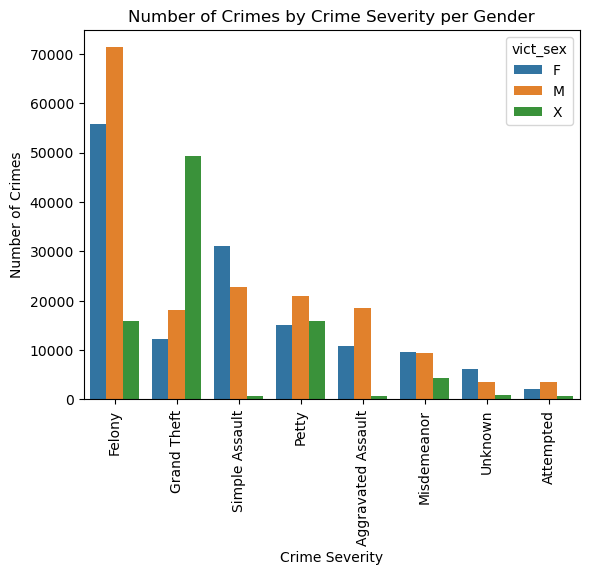

In [27]:
severity_counts = df_crimes_without_nulls['crime_severity'].value_counts().sort_values(ascending=False).index

sns.countplot(x="crime_severity", data=df_crimes_without_nulls, hue="vict_sex", order=severity_counts)

plt.ylabel("Number of Crimes")
plt.xlabel("Crime Severity")
plt.title("Number of Crimes by Crime Severity per Gender")
plt.xticks(rotation=90)
plt.show()

In [28]:
df_crimes_without_nulls['crime_severity'].value_counts()

crime_severity
Felony                142975
Grand Theft            79695
Simple Assault         54782
Petty                  52007
Aggravated Assault     29898
Misdemeanor            23466
Unknown                10822
Attempted               6424
Name: count, dtype: int64

The original Premis Desc column contains almost 300 unique values, which is going to be hard to visualize and analyze. Which is why i've decided to reduce the number of unique values in this column, by creating 41 new more readable and concise categories.

In [30]:
premis_cat_mapping = {
    'SIDEWALK': 'Outdoor',
    'Restaurant/Fast Food': 'Food Establishment',
    'Park/Playground': 'Outdoor',
    'Apartment/Condo': 'Residential',
    'Residential': 'Residential',
    'MARKET': 'Food Establishment',
    'LA UNION STATION (NOT LINE SPECIFIC)': 'Transportation',
    'MTA BUS': 'Public Transportation',
    'VEHICLE, PASSENGER/TRUCK': 'Vehicle',
    'OTHER BUSINESS': 'Business',
    'STREET': 'Street',
    'CYBERSPACE': 'Cyberspace',
    'OTHER/OUTSIDE': 'Outdoor',
    'GARAGE/CARPORT': 'Residential',
    'OTHER PREMISE': 'Other',
    'HOTEL': 'Lodging',
    'Store': 'Retail',
    'BAR/COCKTAIL/NIGHTCLUB': 'Entertainment',
    'DRIVEWAY': 'Residential',
    'YARD (RESIDENTIAL/BUSINESS)': 'Residential',
    'NIGHT CLUB (OPEN EVENINGS ONLY)': 'Entertainment',
    'MINI-MART': 'Food Establishment',
    'AUTOMATED TELLER MACHINE (ATM)': 'Financial Institution',
    "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS": 'Residential',
    'School': 'Educational',
    'ALLEY': 'Street',
    'NURSING/CONVALESCENT/RETIREMENT HOME': 'Healthcare',
    'PATIO*': 'Outdoor',
    'OTHER RESIDENCE': 'Residential',
    'BANK': 'Financial Institution',
    'GAS STATION': 'Gas Station',
    'PORCH, RESIDENTIAL': 'Residential',
    'MOTEL': 'Lodging',
    'CAR WASH': 'Automotive',
    'WEBSITE': 'Online',
    'MEDICAL/DENTAL OFFICES': 'Healthcare',
    'MTA - ORANGE LINE - WOODMAN': 'Public Transportation',
    'CONVENTION CENTER': 'Entertainment',
    'Hospital': 'Healthcare',
    'PUBLIC STORAGE': 'Storage',
    'TRANSPORTATION FACILITY (AIRPORT)': 'Transportation',
    'SPORTS VENUE, OTHER': 'Entertainment',
    'MTA - RED LINE - 7TH AND METRO CENTER': 'Public Transportation',
    'SLIPS/DOCK/MARINA/BOAT': 'Marina',
    'OFFICE BUILDING/OFFICE': 'Office',
    '7TH AND METRO CENTER (NOT LINE SPECIFIC)': 'Public Transportation',
    'STUDIO (FILM/PHOTOGRAPHIC/MUSIC)': 'Entertainment',
    'DODGER STADIUM': 'Entertainment',
    'BUS STOP': 'Public Transportation',
    'BAR/SPORTS BAR (OPEN DAY & NIGHT)': 'Entertainment',
    'MAIL BOX': 'Mail Services',
    'CONDOMINIUM/TOWNHOUSE': 'Residential',
    "DIY CENTER (LOWE'S,HOME DEPOT,OSH,CONTRACTORS WAREHOUSE)": 'Retail',
    'HEALTH SPA/GYM': 'Healthcare',
    'STAIRWELL*': 'Residential',
    'ABANDONED BUILDING ABANDONED HOUSE': 'Residential',
    'VALET': 'Parking',
    'MTA - RED LINE - WILSHIRE/VERMONT': 'Public Transportation',
    'MTA - RED LINE - UNION STATION': 'Public Transportation',
    'TRANSIENT ENCAMPMENT': 'Outdoor',
    'THE BEVERLY CENTER': 'Retail',
    'TRANSITIONAL HOUSING/HALFWAY HOUSE': 'Residential',
    'FIRE STATION': 'Public Services',
    'STORAGE SHED': 'Storage',
    'TV/RADIO/APPLIANCE': 'Retail',
    'GROUP HOME': 'Residential',
    "MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV'S/MOTORHOME": 'Residential',
    'VACANT LOT': 'Outdoor',
    'MISSIONS/SHELTERS': 'Residential',
    'COLLEGE/JUNIOR COLLEGE/UNIVERSITY': 'Educational',
    'COLISEUM': 'Entertainment',
    'TERMINAL, OTHER THAN MTA': 'Transportation',
    'MTA - RED LINE - HOLLYWOOD/VINE': 'Public Transportation',
    'DETENTION/JAIL FACILITY': 'Public Services',
    'BEACH': 'Outdoor',
    'THEATRE/MOVIE': 'Entertainment',
    'WAREHOUSE': 'Storage',
    'BALCONY*': 'Residential',
    'GARMENT MANUFACTURER': 'Manufacturing',
    "VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)": 'Vehicle',
    'SPORTS ARENA': 'Entertainment',
    'CHECK CASHING*': 'Financial Institution',
    'THE GROVE': 'Retail',
    'MTA - RED LINE - VERMONT/SUNSET': 'Public Transportation',
    'TAXI': 'Vehicle',
    'DRIVE THRU*': 'Food Establishment',
    'LAUNDROMAT': 'Retail',
    'LIBRARY': 'Educational',
    'POLICE FACILITY': 'Public Services',
    'CONSTRUCTION SITE': 'Construction',
    'NAIL SALON': 'Beauty',
    'NAN': 'Other',
    'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)': 'Religious',
    'MTA - EXPO LINE - EXPO/VERMONT': 'Public Transportation',
    'THE BEVERLY CONNECTION': 'Retail',
    'METROLINK TRAIN': 'Public Transportation',
    'MTA - GREEN LINE - AVALON': 'Public Transportation',
    'POST OFFICE': 'Mail Services',
    'MTA - BLUE LINE - 103RD/WATTS TOWERS': 'Public Transportation',
    'SHORT-TERM VACATION RENTAL': 'Lodging',
    'SYNAGOGUE/TEMPLE':"Religious",
    'MTA - GOLD LINE - UNION STATION': 'Public Transportation',
    'GUN/SPORTING GOODS': 'Retail',
    'MUSEUM': 'Entertainment',
    'MTA - BLUE LINE - VERNON': 'Public Transportation',
    'MTA - RED LINE - HOLLYWOOD/WESTERN': 'Public Transportation',
    'AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)': 'Automotive',
    'TOOL SHED*': 'Residential',
    'MANUFACTURING COMPANY': 'Manufacturing',
    'TATTOO PARLOR*': 'Beauty',
    'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)': 'Government',
    'MTA - EXPO LINE - LATTC/ORTHO INSTITUTE': 'Public Transportation',
    'ELEVATOR': 'Residential',
    'TOW YARD*': 'Automotive',
    'PROJECT/TENEMENT/PUBLIC HOUSING': 'Residential',
    'MTA - RED LINE - VERMONT/BEVERLY': 'Public Transportation',
    'MTA - GREEN LINE - HARBOR FWY': 'Public Transportation',
    'CREDIT UNION': 'Financial Institution',
    'RECYCLING CENTER': 'Recycling',
    'MUNICIPAL BUS LINE INCLUDES LADOT/DASH': 'Public Transportation',
    'MTA - RED LINE - HOLLYWOOD/HIGHLAND': 'Public Transportation',
    'MTA - EXPO LINE - EXPO/CRENSHAW': 'Public Transportation',
    'MTA - RED LINE - UNIVERSAL CITY/STUDIO CITY': 'Public Transportation',
    'HARDWARE/BUILDING SUPPLY': 'Retail',
    'DAY CARE/ADULTS*': 'Childcare',
    'MEDICAL MARIJUANA FACILITIES/BUSINESSES': 'Healthcare',
    'MTA - EXPO LINE - EXPO/WESTERN': 'Public Transportation',
    'MTA - GREEN LINE - AVIATION/LAX': 'Public Transportation',
    'FREEWAY': 'Street',
    'BUS-CHARTER/PRIVATE': 'Public Transportation',
    'BUS DEPOT/TERMINAL, OTHER THAN MTA': 'Public Transportation',
    'PUBLIC RESTROOM/OUTSIDE*': 'Public Restroom',
    'MTA - EXPO LINE - JEFFERSON/USC': 'Public Transportation',
    'AUTO SALES LOT': 'Automotive',
    'MTA - RED LINE - NORTH HOLLYWOOD': 'Public Transportation',
    'POOL-PUBLIC/OUTDOOR OR INDOOR*': 'Entertainment',
    'MTA - SILVER LINE - HARBOR GATEWAY TRANSIT CTR': 'Public Transportation',
    'MTA - BLUE LINE - 7TH AND METRO CENTER': 'Public Transportation',
    'FACTORY': 'Manufacturing',
    'UNDERPASS/BRIDGE*': 'Street',
    'FINANCE COMPANY': 'Financial Institution',
    'GOLF COURSE*': 'Recreation',
    'BOWLING ALLEY*': 'Recreation',
    'MASSAGE PARLOR': 'Beauty',
    'MTA - RED LINE - VERMONT/SANTA MONICA': 'Public Transportation',
    'MTA - RED LINE - PERSHING SQUARE': 'Public Transportation',
    'MTA - BLUE LINE - WASHINGTON': 'Public Transportation',
    'RIVER BED*': 'Outdoor',
    'GREYHOUND OR INTERSTATE BUS': 'Public Transportation',
    'MTA - BLUE LINE - PICO': 'Public Transportation',
    'CATERING/ICE CREAM TRUCK': 'Food Establishment',
    'MTA - BLUE LINE - SAN PEDRO': 'Public Transportation',
    'CLEANER/LAUNDROMAT': 'Retail',
    'TRAIN TRACKS': 'Transportation',
    'MTA - PURPLE LINE - WILSHIRE/WESTERN': 'Public Transportation',
    'MTA - ORANGE LINE - VAN NUYS': 'Public Transportation',
    'FOSTER HOME BOYS OR GIRLS*': 'Residential',
    'MTA - ORANGE LINE - BALBOA': 'Public Transportation',
    'AMTRAK TRAIN': 'Public Transportation',
    'HIGH-RISE BUILDING': 'Residential',
    'VISION CARE FACILITY*': 'Healthcare',
    'DELIVERY SERVICE (FED EX, UPS, COURIERS,COURIER SERVICE)*': 'Delivery Service',
    'ESCALATOR*': 'Transportation',
    'ENTERTAINMENT/COMEDY CLUB (OTHER)': 'Entertainment',
    'STAPLES CENTER *': 'Entertainment',
    'MTA - EXPO LINE - EXPO/LA BREA': 'Public Transportation',
    'TRAIN, OTHER THAN MTA (ALSO QUERY 809/810/811)': 'Public Transportation',
    'MTA - SILVER LINE - MANCHESTER': 'Public Transportation',
    'BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK*': 'Financial Institution',
    'PUBLIC RESTROOM(INDOORS-INSIDE)': 'Public Restroom',
    'BUS STOP/LAYOVER (ALSO QUERY 124)': 'Public Transportation',
    'MTA - EXPO LINE - FARMDALE': 'Public Transportation',
    'MTA - GOLD LINE - CHINATOWN': 'Public Transportation',
    'MTA - EXPO LINE - 7TH AND METRO CENTER': 'Public Transportation',
    'ENERGY PLANT/FACILITY': 'Energy Plant',
    'MTA - EXPO LINE - EXPO/BUNDY': 'Public Transportation',
    'OTHER RR TRAIN (UNION PAC, SANTE FE ETC': 'Transportation',
    'MTA - ORANGE LINE - ROSCOE': 'Public Transportation',
    'SWAP MEET': 'Retail',
    'AIRCRAFT': 'Transportation',
    'MTA - GOLD LINE - SOTO': 'Public Transportation',
    'MTA - EXPO LINE - LA CIENEGA/JEFFERSON': 'Public Transportation',
    'MTA - ORANGE LINE - NORTH HOLLYWOOD': 'Public Transportation',
    'PEDESTRIAN OVERCROSSING': 'Transportation',
    'MTA - ORANGE LINE - RESEDA': 'Public Transportation',
    'MTA - EXPO LINE - PALMS': 'Public Transportation',
    'OTHER PLACE OF WORSHIP': 'Religious',
    'CEMETARY*': 'Religious',
    'BASKETBALL COURTS': 'Recreation',
    'MTA - GOLD LINE - MARIACHI PLAZA': 'Public Transportation',
    'MTA - BLUE LINE - GRAND/LATTC': 'Public Transportation',
    'FRAT HOUSE/SORORITY/DORMITORY': 'Residential',
    'SAVINGS & LOAN': 'Financial Institution',
    'TRUCK, COMMERICAL': 'Vehicle',
    'MTA - GOLD LINE - LINCOLN/CYPRESS': 'Public Transportation',
    'MTA - SILVER LINE - SLAUSON': 'Public Transportation',
    'DAY CARE/CHILDREN*': 'Childcare',
    'MTA - PURPLE LINE - WILSHIRE/VERMONT': 'Public Transportation',
    'MTA - EXPO LINE - PICO': 'Public Transportation',
    'DRIVE THRU BANKING (WINDOW)*': 'Financial Institution',
    'TELECOMMUNICATION FACILITY/LOCATION': 'Telecommunication',
    'ARCADE,GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE CHEESE)*': 'Entertainment',
    'MOSQUE*': 'Religious',
    'ABORTION CLINIC/ABORTION FACILITY*': 'Healthcare',
    'EQUIPMENT RENTAL': 'Retail',
    'DAM/RESERVOIR': 'Infrastructure',
    'MTA - PURPLE LINE - 7TH AND METRO CENTER': 'Public Transportation',
    'MORTUARY': 'Funeral Services',
    'MTA - ORANGE LINE - TAMPA': 'Public Transportation',
    'MTA - EXPO LINE - EXPO/SEPULVEDA': 'Public Transportation',
    'MTA - ORANGE LINE - VALLEY COLLEGE': 'Public Transportation',
    'TRAIN DEPOT/TERMINAL, OTHER THAN MTA': 'Public Transportation',
    'MTA - ORANGE LINE - PIERCE COLLEGE': 'Public Transportation',
    'METHADONE CLINIC': 'Healthcare',
    'MTA - ORANGE LINE - DE SOTO': 'Public Transportation',
    'MTA - GOLD LINE - HERITAGE SQ': 'Public Transportation',
    'MTA - ORANGE LINE - NORDHOFF': 'Public Transportation',
    'MTA - PURPLE LINE - WILSHIRE/NORMANDIE': 'Public Transportation',
    'MTA - ORANGE LINE - LAUREL CANYON': 'Public Transportation',
    'TUNNEL': 'Transportation',
    'MTA - GOLD LINE - PICO/ALISO': 'Public Transportation',
    'MTA - PURPLE LINE - PERSHING SQUARE': 'Public Transportation',
    'CULTURAL SIGNIFICANCE/MONUMENT': 'Entertainment',
    'WATER FACILITY': 'Infrastructure',
    'MTA - ORANGE LINE - WOODLEY': 'Public Transportation',
    'MTA - ORANGE LINE - SEPULVEDA': 'Public Transportation',
    'TRASH CAN/TRASH DUMPSTER': 'Waste Management',
    'HOSPICE': 'Healthcare',
    'PAY PHONE': 'Telecommunication',
    'MASS GATHERING LOCATION': 'Entertainment',
    'MTA - GOLD LINE - SOUTHWEST MUSEUM': 'Public Transportation',
    'MTA - GOLD LINE - INDIANA': 'Public Transportation',
    'MTA - ORANGE LINE - CANOGA': 'Public Transportation',
    'MTA - ORANGE LINE - CHATSWORTH': 'Public Transportation',
    'MTA - ORANGE LINE - SHERMAN WAY': 'Public Transportation',
    'COMPUTER SERVICES/REPAIRS/SALES': 'Technology',
    'MTA - SILVER LINE - LAC/USC MEDICAL CENTER': 'Public Transportation',
    'MUSCLE BEACH': 'Recreation',
    'HARBOR FRWY STATION (NOT LINE SPECIFIC)': 'Public Transportation',
    'MTA - SILVER LINE - UNION STATION': 'Public Transportation',
    'OTHER INTERSTATE, CHARTER BUS': 'Public Transportation',
    'CHEMICAL STORAGE/MANUFACTURING PLANT': 'Manufacturing',
    'ABATEMENT LOCATION': 'Other',
    'MTA - SILVER LINE - PACIFIC COAST HWY': 'Public Transportation',
    'MTA - SILVER LINE - HARBOR FWY': 'Public Transportation',
    'SKATING RINK*': 'Recreation',
    'RETIRED (DUPLICATE) DO NOT USE THIS CODE': 'Other',
    'MTA - SILVER LINE - 37TH ST/USC': 'Public Transportation',
    'OIL REFINERY': 'Manufacturing',
    'HOCKEY RINK/ICE HOCKEY': 'Recreation',
    'MTA - PURPLE LINE - UNION STATION': 'Public Transportation',
    'MTA - SILVER LINE - ROSECRANS': 'Public Transportation',
     'RESTAURANT/FAST FOOD': 'Food Establishment',
    'PARKING LOT': 'Parking',
    'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)': 'Residential',
    'SINGLE FAMILY DWELLING': 'Residential',
    'PARK/PLAYGROUND': 'Outdoor',
    'MEMBERSHIP STORE (COSTCO,SAMS CLUB)*': 'Retail',
    'LIQUOR STORE': 'Retail',
    'PARKING UNDERGROUND/BUILDING': 'Parking',
    'DEPARTMENT STORE': 'Retail',
    'ELEMENTARY SCHOOL': 'Educational',
    'DRUG STORE': 'Retail',
    'DISCOUNT STORE (99 CENT,DOLLAR,ETC.)': 'Retail',
    'JUNIOR HIGH SCHOOL': 'Educational',
    'OTHER STORE': 'Retail',
    'HIGH SCHOOL': 'Educational',
    'HOSPITAL': 'Healthcare',
    'CLOTHING STORE': 'Retail',
    "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)": 'Food Establishment',
    'NURSERY/FLOWER SHOP': 'Retail',
    'AUTO SUPPLY STORE*': 'Retail',
    'ELECTRONICS STORE (IE:RADIO SHACK, ETC.)': 'Retail',
    'SHOPPING MALL (COMMON AREA)': 'Retail',
    'CELL PHONE STORE': 'Retail',
    'BEAUTY/BARBER SHOP': 'Beauty',
    'AUTO REPAIR SHOP': 'Automotive',
    'MTA - EXPO LINE - WESTWOOD/RANCHO PARK': 'Public Transportation',
    'MTA - RED LINE - WESTLAKE/MACARTHUR PARK': 'Public Transportation',
    'BEAUTY SUPPLY STORE': 'Beauty',
    'SKATEBOARD FACILITY/SKATEBOARD PARK*': 'Recreation',
    'nan': 'Other',
    'SPECIALTY SCHOOL/OTHER': 'Educational',
    'TOBACCO SHOP': 'Retail',
    'PHARMACY INSIDE STORE OR SUPERMARKET*': 'Retail',
    'JEWELRY STORE': 'Retail',
    'MTA - EXPO LINE - EXPO PARK/USC': 'Public Transportation',
    'BOOK STORE': 'Retail',
    'OPTICAL OFFICE INSIDE STORE OR SUPERMARKET*': 'Retail',
    'MTA - PURPLE LINE - CIVIC CENTER/GRAND PARK': 'Public Transportation',
    'PRIVATE SCHOOL/PRESCHOOL': 'Educational',
    'APARTMENT/CONDO COMMON LAUNDRY ROOM': 'Residential',
    'MTA - RED LINE - CIVIC CENTER/GRAND PARK': 'Public Transportation',
    'BUS, SCHOOL, CHURCH': 'Public Transportation',
    "SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S CLUB": 'Adult Entertainment',
    'TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*': 'Educational',
    'PET STORE': 'Retail',
    'FURNITURE STORE': 'Retail',
    'AMUSEMENT PARK*': 'Entertainment',
    'MTA PROPERTY OR PARKING LOT': 'Public Transportation',
    'MTA - PURPLE LINE - WESTLAKE/MACARTHUR PARK': 'Public Transportation',
    'VETERINARIAN/ANIMAL HOSPITAL': 'Healthcare',
    'MTA - GOLD LINE - HIGHLAND PARK': 'Public Transportation',
    'PAWN SHOP': 'Retail',
    'BANKING INSIDE MARKET-STORE *': 'Financial Institution',
    'VIDEO RENTAL STORE': 'Retail',
    'SURPLUS SURVIVAL STORE': 'Retail',
    'RECORD-CD MUSIC/COMPUTER GAME STORE': 'Retail',
    'DISCOUNT STORE (99 CENT,DOLLAR,ETC.': 'Retail'
}

# Apply the mapping to the DataFrame
df_crimes_without_nulls["premis_desc"] = df_crimes_without_nulls["premis_desc"].astype(str)
df_crimes_without_nulls['cleaned_premis_desc'] = df_crimes_without_nulls['premis_desc'].map(premis_cat_mapping)


In [31]:
df_crimes_without_nulls['cleaned_premis_desc'].nunique()

42

I will use the same approach of mapping value to new categories as i've used earlier. With the aim of engineering more relevant, easy to read and understand categories. While also reducing redundancy.
The number of unique categories went from 77 to 21.

In [32]:
weapon_mapping = {
    'FOLDING KNIFE': 'Knife',
    'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)': 'Physical Force',
    'UNKNOWN WEAPON/OTHER WEAPON': 'Unknown',
    'SEMI-AUTOMATIC PISTOL': 'Firearm',
    'MACE/PEPPER SPRAY': 'Chemical Spray',
    'HAND GUN': 'Firearm',
    'PIPE/METAL PIPE': 'Blunt Instrument',
    'BLUNT INSTRUMENT': 'Blunt Instrument',
    'VERBAL THREAT': 'Threat',
    'CONCRETE BLOCK/BRICK': 'Blunt Instrument',
    'VEHICLE': 'Vehicle',
    'BOTTLE': 'Bottle',
    'UNKNOWN FIREARM': 'Firearm',
    'STRAIGHT RAZOR': 'Sharp Object',
    'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH': 'Knife',
    'FIRE': 'Fire',
    'HAMMER': 'Blunt Instrument',
    'STICK': 'Blunt Instrument',
    'PHYSICAL PRESENCE': 'Physical Force',
    'SIMULATED GUN': 'Firearm',
    'MACHETE': 'Knife',
    'OTHER FIREARM': 'Firearm',
    'KITCHEN KNIFE': 'Knife',
    'KNIFE WITH BLADE 6INCHES OR LESS': 'Knife',
    'OTHER KNIFE': 'Knife',
    'CLUB/BAT': 'Blunt Instrument',
    'BELT FLAILING INSTRUMENT/CHAIN': 'Blunt Instrument',
    'UNKNOWN TYPE CUTTING INSTRUMENT': 'Sharp Object',
    'ROCK/THROWN OBJECT': 'Thrown Object',
    'BOARD': 'Blunt Instrument',
    'AIR PISTOL/REVOLVER/RIFLE/BB GUN': 'Firearm',
    'SEMI-AUTOMATIC RIFLE': 'Firearm',
    'SCISSORS': 'Sharp Object',
    'OTHER CUTTING INSTRUMENT': 'Sharp Object',
    'RIFLE': 'Firearm',
    'ICE PICK': 'Sharp Object',
    'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
    'STUN GUN': 'Electric Shock',
    'GLASS': 'Sharp Object',
    'SWORD': 'Sharp Object',
    'REVOLVER': 'Firearm',
    'EXPLOXIVE DEVICE': 'Explosive',
    'RAZOR': 'Sharp Object',
    'AXE': 'Blunt Instrument',
    'SCREWDRIVER': 'Sharp Object',
    'SWITCH BLADE': 'Knife',
    'TIRE IRON': 'Blunt Instrument',
    'SHOTGUN': 'Firearm',
    'BRASS KNUCKLES': 'Blunt Instrument',
    'SCALDING LIQUID': 'Chemical',
    'FIXED OBJECT': 'Blunt Instrument',
    'ASSAULT WEAPON/UZI/AK47/ETC': 'Firearm',
    'TOY GUN': 'Firearm (Toy)',
    'DOG/ANIMAL (SIC ANIMAL ON)': 'Animal',
    'CAUSTIC CHEMICAL/POISON': 'Chemical',
    'RAZOR BLADE': 'Sharp Object',
    'DIRK/DAGGER': 'Sharp Object',
    'ROPE/LIGATURE': 'Strangulation',
    'BOMB THREAT': 'Explosive',
    'CLEAVER': 'Knife',
    'LIQUOR/DRUGS': 'Substance',
    'SYRINGE': 'Sharp Object',
    'AUTOMATIC WEAPON/SUB-MACHINE GUN': 'Firearm',
    'DEMAND NOTE': 'Threat',
    'SAWED OFF RIFLE/SHOTGUN': 'Firearm',
    'UZI SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
    'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON': 'Firearm',
    'STARTER PISTOL/REVOLVER': 'Firearm',
    'BOW AND ARROW': 'Projectile Weapon',
    'UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
    'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON': 'Firearm',
    'RELIC FIREARM': 'Firearm',
    'MARTIAL ARTS WEAPONS': 'Weapon',
    'BOWIE KNIFE': 'Knife',
    'ANTIQUE FIREARM': 'Firearm',
    'BLACKJACK': 'Blunt Instrument',
    'M1-1 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm'
}

df_crimes_without_nulls['cleaned_weapon_desc'] = df_crimes_without_nulls['weapon_desc'].map(weapon_mapping)
df_crimes_without_nulls['cleaned_weapon_desc'].value_counts()

cleaned_weapon_desc
Firearm              281886
Physical Force        70934
Unknown               14666
Threat                10418
Knife                  8863
Blunt Instrument       5287
Sharp Object           1819
Chemical Spray         1585
Vehicle                1492
Thrown Object          1211
Bottle                 1060
Fire                    298
Electric Shock          182
Chemical                161
Explosive               110
Firearm (Toy)            84
Animal                   24
Substance                23
Strangulation            16
Projectile Weapon        11
Weapon                    4
Name: count, dtype: int64

In [96]:
df_crimes_without_nulls["diff_occ_rptd"] = df_crimes_without_nulls["date_rptd"] - df_crimes_without_nulls["date_occ"]
df_crimes_without_nulls["diff_occ_rptd"].isnull().sum()

0

# **4.7 Data Quality Validation** *(verifying data transformations)*  

### 4.7.1 Checking the correctness of data structure

In [72]:
df_crimes_without_nulls.columns.to_list()

['dr_no',
 'date_rptd',
 'date_occ',
 'time_occ',
 'area',
 'area_name',
 'rpt_dist_no',
 'crm_cd',
 'crm_cd_desc',
 'vict_age',
 'vict_sex',
 'vict_descent',
 'premis_cd',
 'premis_desc',
 'weapon_used_cd',
 'weapon_desc',
 'status_desc',
 'crm_cd_1',
 'location',
 'lat',
 'lon',
 'Hour',
 'crime_severity']

In [73]:
df_crimes_without_nulls.dtypes

dr_no                      int64
date_rptd         datetime64[ns]
date_occ          datetime64[ns]
time_occ                   int64
area                       int64
area_name                 object
rpt_dist_no                int64
crm_cd                     int64
crm_cd_desc               object
vict_age                   int64
vict_sex                  object
vict_descent              object
premis_cd                float64
premis_desc               object
weapon_used_cd           float64
weapon_desc               object
status_desc               object
crm_cd_1                 float64
location                  object
lat                      float64
lon                      float64
Hour                       int32
crime_severity            object
dtype: object

In [74]:
df_crimes_without_nulls.nunique()

dr_no             400134
date_rptd           1280
date_occ            1280
time_occ            1439
area                  21
area_name             21
rpt_dist_no         1171
crm_cd               112
crm_cd_desc          112
vict_age             102
vict_sex               3
vict_descent          18
premis_cd            305
premis_desc          303
weapon_used_cd        78
weapon_desc           77
status_desc            6
crm_cd_1             119
location           53316
lat                 5228
lon                 4891
Hour                  24
crime_severity         8
dtype: int64

In [75]:
df_crimes_without_nulls.duplicated().sum()

0

### 4.7.2 Checking data completeness ---> ✅

In [76]:
df_crimes_without_nulls.isnull().sum()

dr_no              0
date_rptd          0
date_occ           0
time_occ           0
area               0
area_name          0
rpt_dist_no        0
crm_cd             0
crm_cd_desc        0
vict_age           0
vict_sex           0
vict_descent       0
premis_cd          0
premis_desc        0
weapon_used_cd     0
weapon_desc        0
status_desc        0
crm_cd_1           0
location           0
lat                0
lon                0
Hour               0
crime_severity    65
dtype: int64

In [77]:
df_crimes_without_nulls.dropna(subset=['crime_severity'], inplace=True)
df_crimes_without_nulls.isnull().sum()

dr_no             0
date_rptd         0
date_occ          0
time_occ          0
area              0
area_name         0
rpt_dist_no       0
crm_cd            0
crm_cd_desc       0
vict_age          0
vict_sex          0
vict_descent      0
premis_cd         0
premis_desc       0
weapon_used_cd    0
weapon_desc       0
status_desc       0
crm_cd_1          0
location          0
lat               0
lon               0
Hour              0
crime_severity    0
dtype: int64

# **5. EDA (Exploratory Data Analysis)** + **Visualization** *(focused on analysis without repeating previous steps)*  

In [142]:
df_cleaned = df_crimes_without_nulls.copy()

In [98]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400134 entries, 0 to 400145
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   dr_no                400134 non-null  int64          
 1   date_rptd            400134 non-null  datetime64[ns] 
 2   date_occ             400134 non-null  datetime64[ns] 
 3   time_occ             400134 non-null  int64          
 4   area                 400134 non-null  int64          
 5   area_name            400134 non-null  object         
 6   rpt_dist_no          400134 non-null  int64          
 7   crm_cd               400134 non-null  int64          
 8   crm_cd_desc          400134 non-null  object         
 9   vict_age             400134 non-null  int64          
 10  vict_sex             400134 non-null  object         
 11  vict_descent         400134 non-null  object         
 12  premis_cd            400134 non-null  float64        
 13  prem

## 5.1 Distribution analysis

### Numeric distribution

In [62]:
def numeric_distribution(df):
    return df.describe().T

def plot_hist(df, target_column, dataset_name):
    sns.histplot(df[target_column], kde=True, bins=30, edgecolor='black', alpha=0.7, color='darkred', line_kws = {'lw':3})
    plt.title(f"Distribution {target_column} in {dataset_name}")
    plt.xlabel(target_column)
    plt.ylabel('Counts')
    plt.grid(True, alpha=0.7)
    plt.show()


def plot_numeric_distribution(df, dataset_name, one_column=False, target_column=''):
    numeric_cols = df.select_dtypes(include=['number']).columns

    plt.figure(figsize=(12,8))
    if not one_column:
        for col in numeric_cols:
            plot_hist(df, col, dataset_name)
    else:
        plot_hist(df, target_column, dataset_name)


def plot_outlier_detection(df, target_column):

    plt.figure(figsize=(20, 8))
    
    sns.violinplot(x=np.log10(df[target_column]), color='crimson')
    plt.title(f'Violin Plot of {target_column}', fontsize=20)
    plt.xlabel(target_column, fontsize=20)
    
    plt.tight_layout()
    plt.show()

In [ ]:
numeric_columns = df_cleaned.select_dtypes(include='number')
numeric_columns.columns.to_list()

['dr_no',
 'time_occ',
 'area',
 'rpt_dist_no',
 'crm_cd',
 'vict_age',
 'premis_cd',
 'weapon_used_cd',
 'crm_cd_1',
 'lat',
 'lon',
 'Hour']

In [ ]:
numeric_distribution(df_cleaned)

,count,mean,min,25%,50%,75%,max,std
dr_no,400134.0,214802944.006445,2113.0,202112154.5,211911385.5,221504952.5,239916487.0,10286519.920852
date_rptd,400134,2021-10-31 10:15:43.280001280,2020-01-01 00:00:00,2020-12-23 00:00:00,2021-11-21 00:00:00,2022-09-12 00:00:00,2023-07-03 00:00:00,NaN
date_occ,400134,2021-10-22 09:20:52.758325760,2020-01-01 00:00:00,2020-12-12 00:00:00,2021-11-10 00:00:00,2022-09-03 00:00:00,2023-07-03 00:00:00,NaN
time_occ,400134.0,1337.733144,1.0,900.0,1420.0,1900.0,2359.0,653.030041
area,400134.0,10.713306,1.0,6.0,11.0,16.0,21.0,6.092224
rpt_dist_no,400134.0,1117.736718,101.0,622.0,1141.0,1617.0,2198.0,609.226022
crm_cd,400134.0,493.34232,110.0,330.0,442.0,626.0,954.0,200.734212
vict_age,400134.0,30.13505,-2.0,4.0,31.0,45.0,120.0,21.856452
premis_cd,400134.0,301.462265,101.0,101.0,203.0,501.0,972.0,216.047824
weapon_used_cd,400134.0,782.025394,101.0,400.0,999.0,999.0,999.0,311.157103


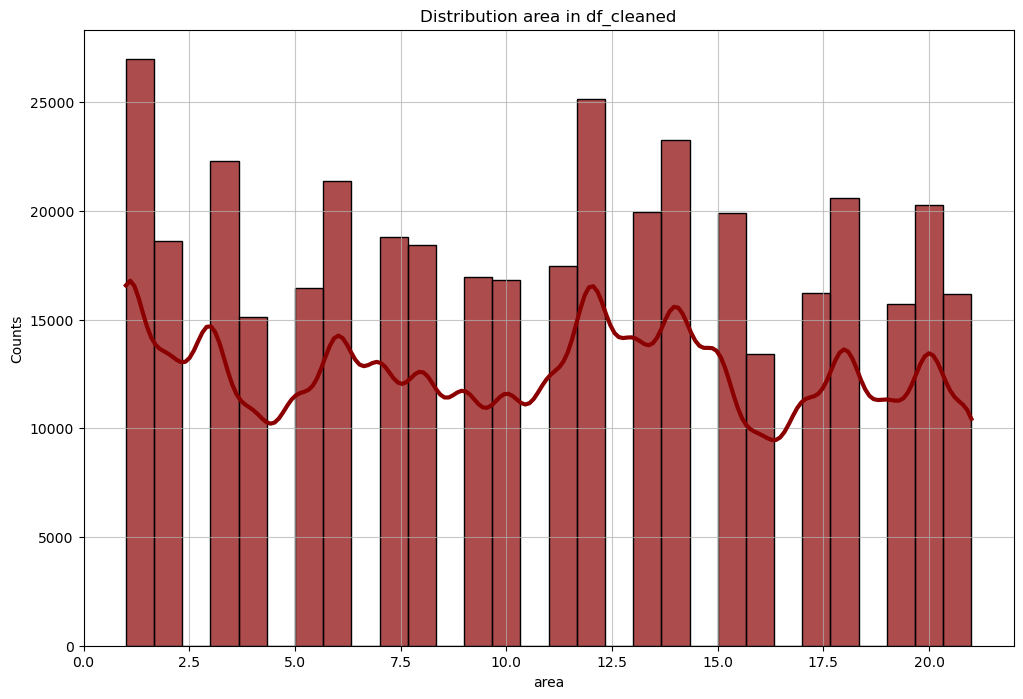

In [ ]:
# plot_numeric_distribution(df_cleaned, 'df_cleaned')
plot_numeric_distribution(df_cleaned, 'df_cleaned', one_column=True, target_column='area')

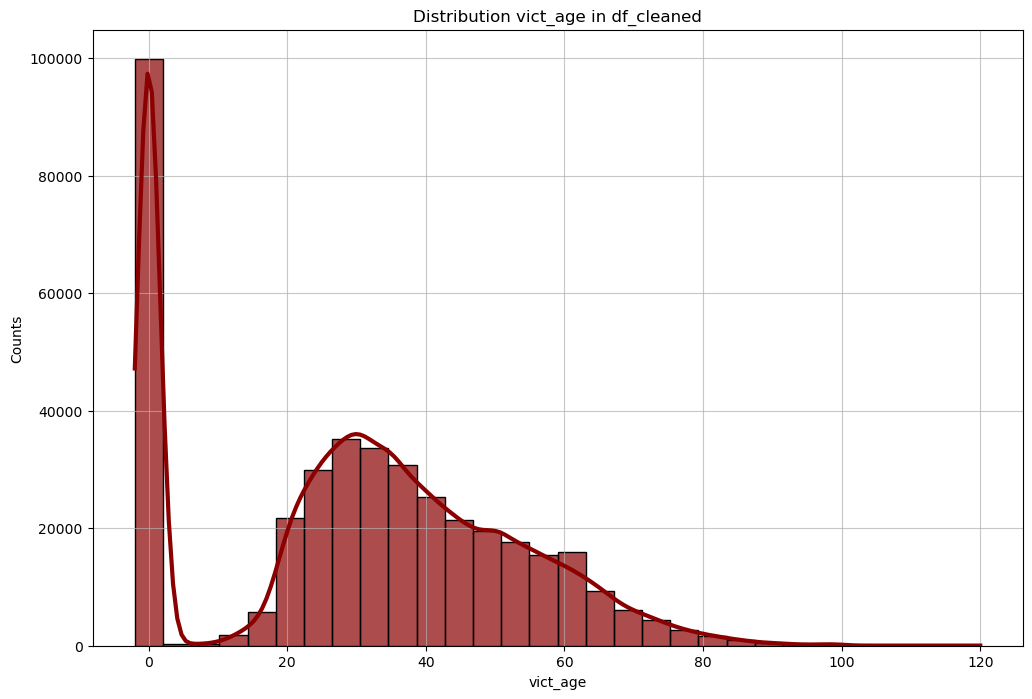

In [79]:
plot_numeric_distribution(df_cleaned, 'df_cleaned', one_column=True, target_column='vict_age')


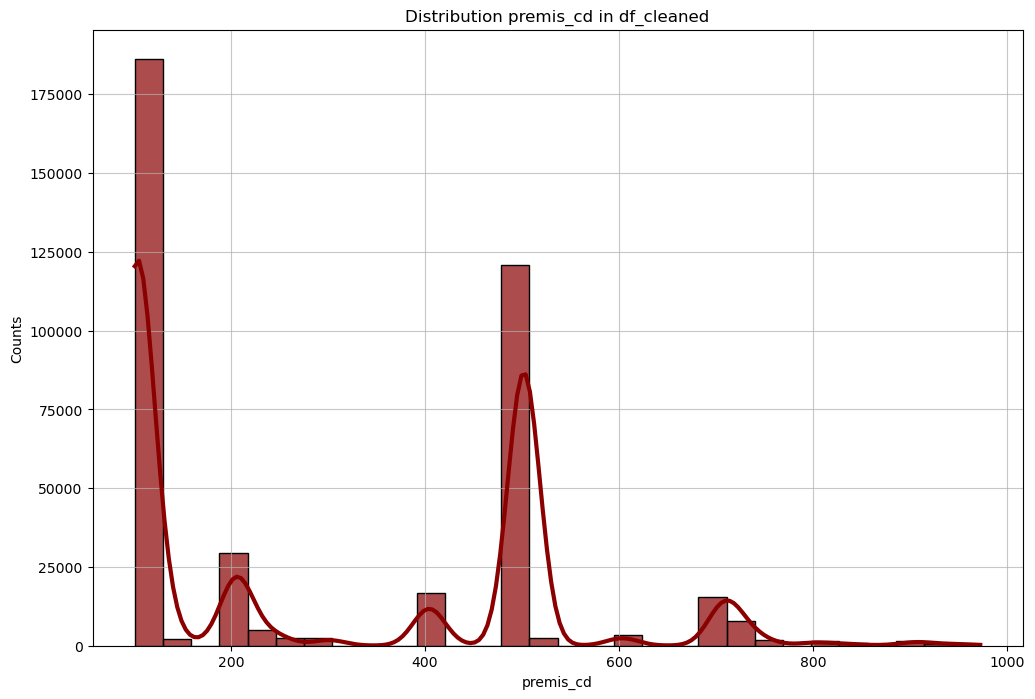

In [80]:
plot_numeric_distribution(df_cleaned, 'df_cleaned', one_column=True, target_column='premis_cd')

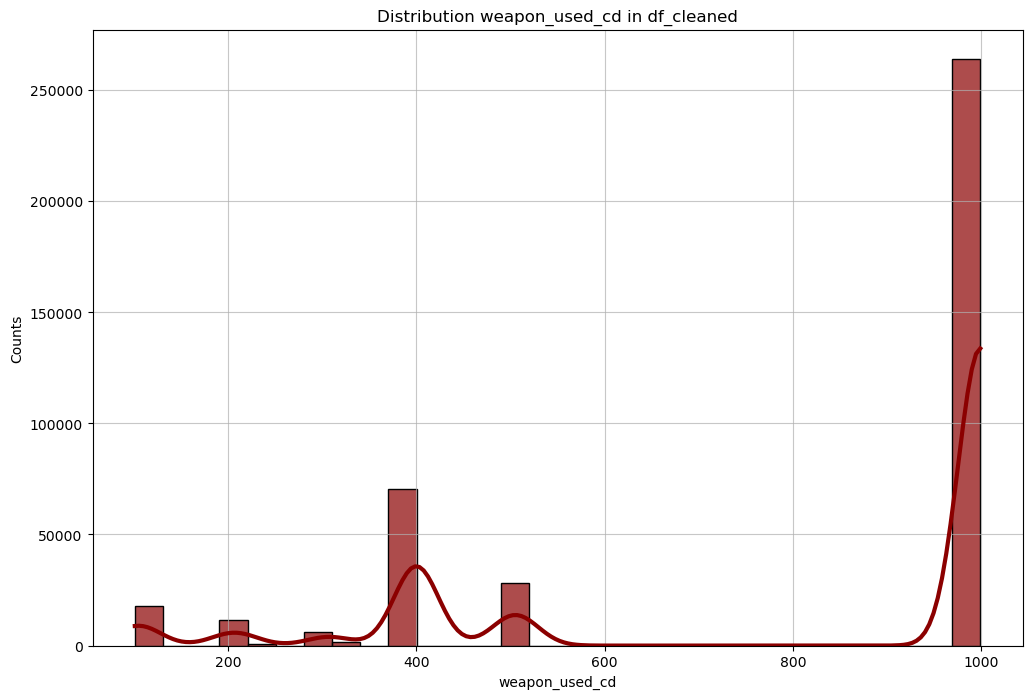

In [81]:
plot_numeric_distribution(df_cleaned, 'df_cleaned', one_column=True, target_column='weapon_used_cd')

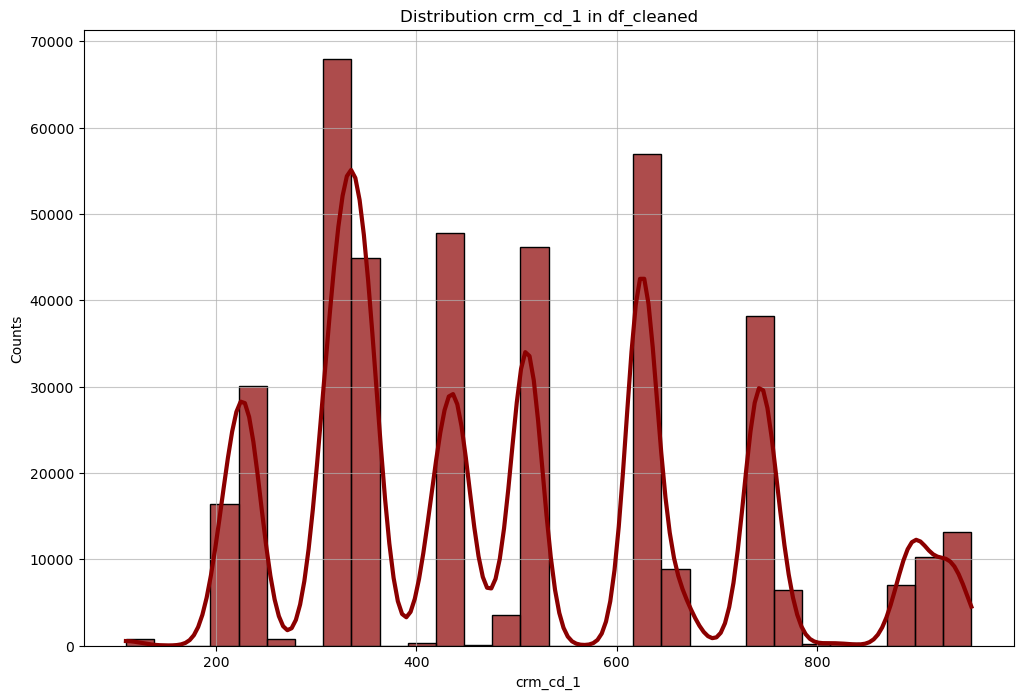

In [82]:
plot_numeric_distribution(df_cleaned, 'df_cleaned', one_column=True, target_column='crm_cd_1')

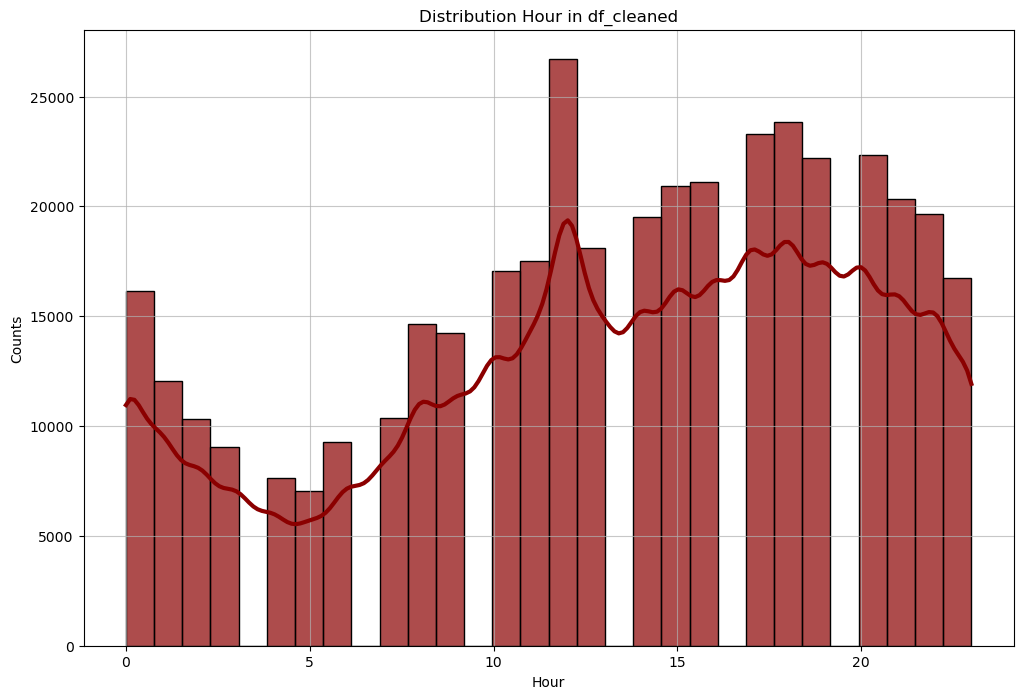

In [ ]:
plot_numeric_distribution(df_cleaned, 'df_cleaned', one_column=True, target_column='Hour')

### Categorical 

In [63]:
def categorical_distribution(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    return {col: df[col].value_counts() for col in categorical_cols}


def plot_categorical_distribution(df, dataset_name, top_n=20):
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        # Pobierz N najczęstszych wartości
        top_values = df[col].value_counts().nlargest(top_n)

        plt.figure(figsize=(10,5))
        sns.countplot(y=df[col], order=top_values.index, hue=df[col], palette="coolwarm")
        plt.title(f"Distribution {col} in {dataset_name}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.xticks(rotation=90)


def generate_colors(n_colors):
    return sns.color_palette("flare", n_colors=n_colors)

def plot_cat_distribution(df, cat_features):

    for column in cat_features:
      
        f, ax = plt.subplots(1, 2, figsize=(20, 8))

        unique_values_count = df[column].nunique()
        colors = generate_colors(unique_values_count)

        df[column].value_counts().plot.pie(
            autopct='%1.1f%%', 
            ax=ax[0], 
            shadow=True, 
            colors=colors
        )
        ax[0].set_ylabel('')
        ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=14)
        
        sns.countplot(
            x=column, 
            data=df, 
            ax=ax[1], 
            palette=colors)
        ax[1].set_xlabel('')
        ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)
        
        plt.suptitle(f'Distribution of {column}', fontsize=20)
        plt.show()

In [83]:
categorical_columns = df_cleaned.select_dtypes(include='object')
categorical_columns.columns.to_list()

['area_name',
 'crm_cd_desc',
 'vict_sex',
 'vict_descent',
 'premis_desc',
 'weapon_desc',
 'status_desc',
 'location',
 'crime_severity']

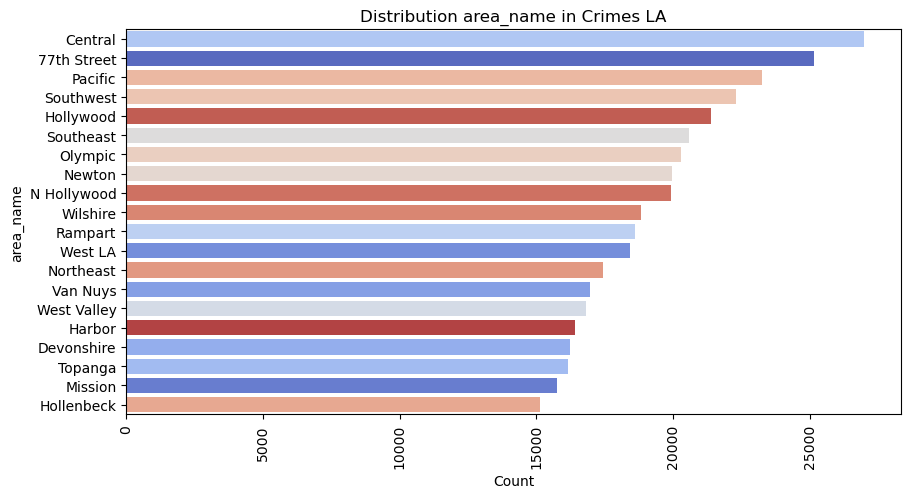

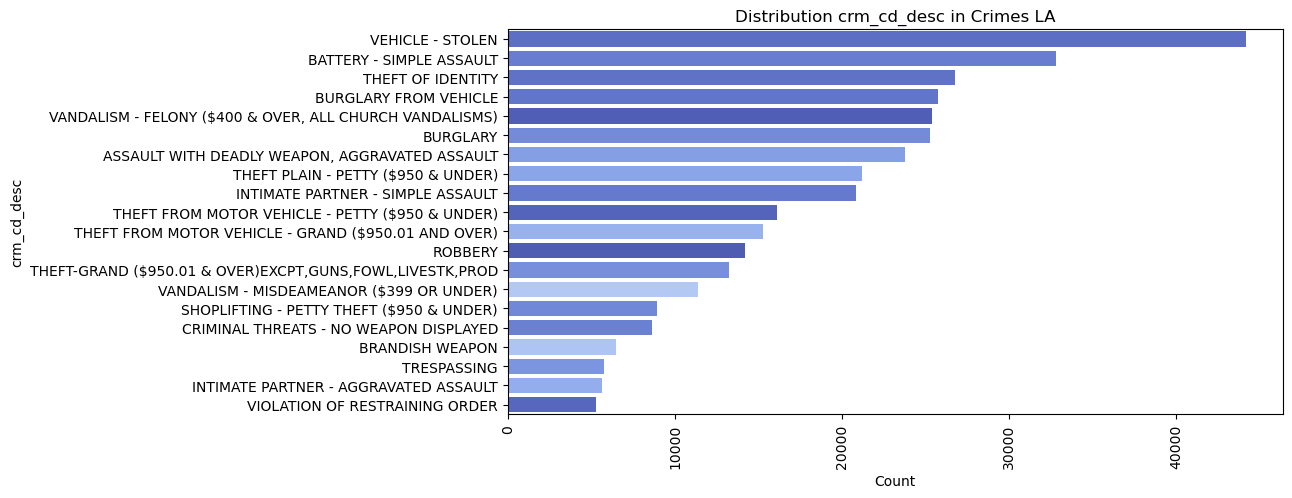

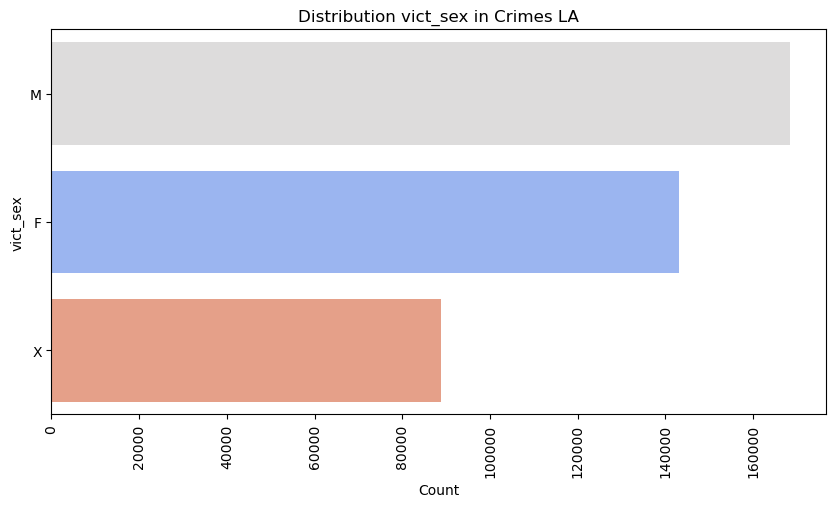

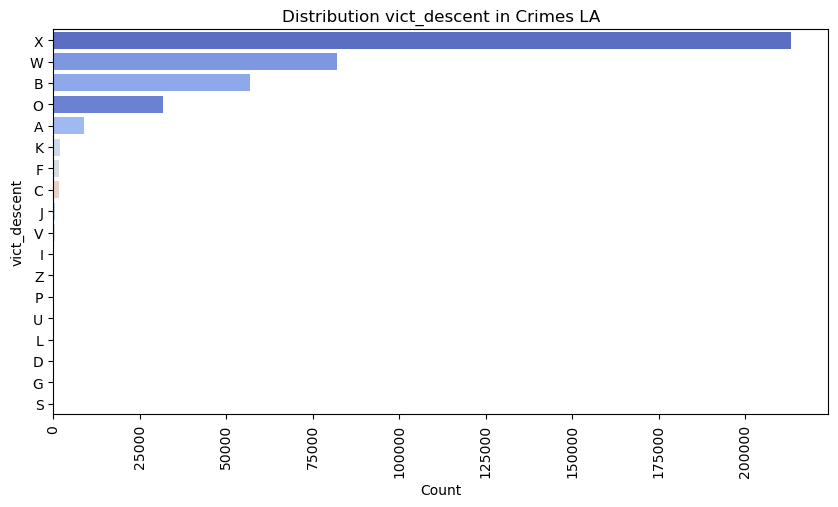

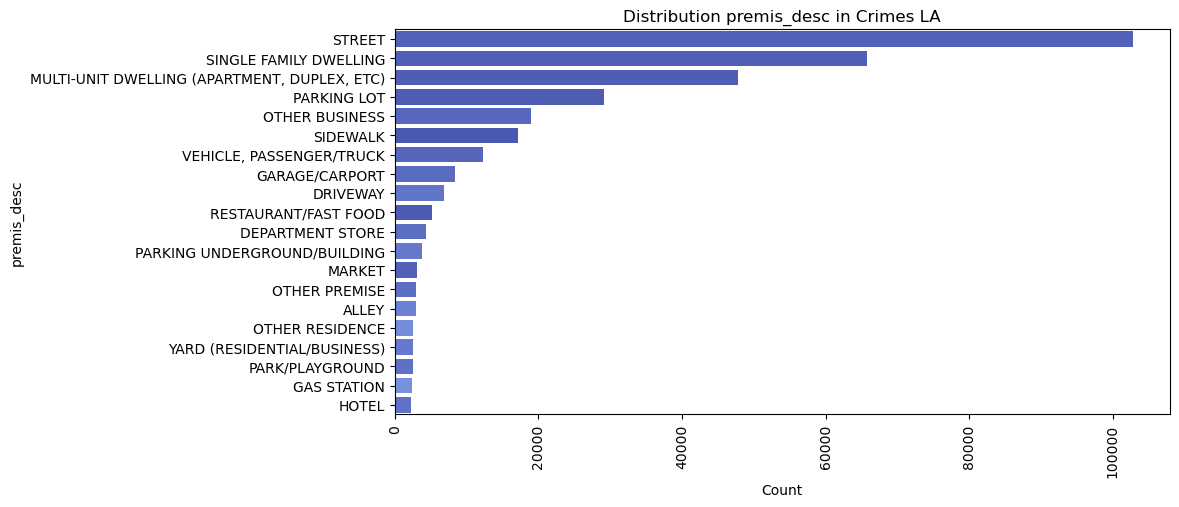

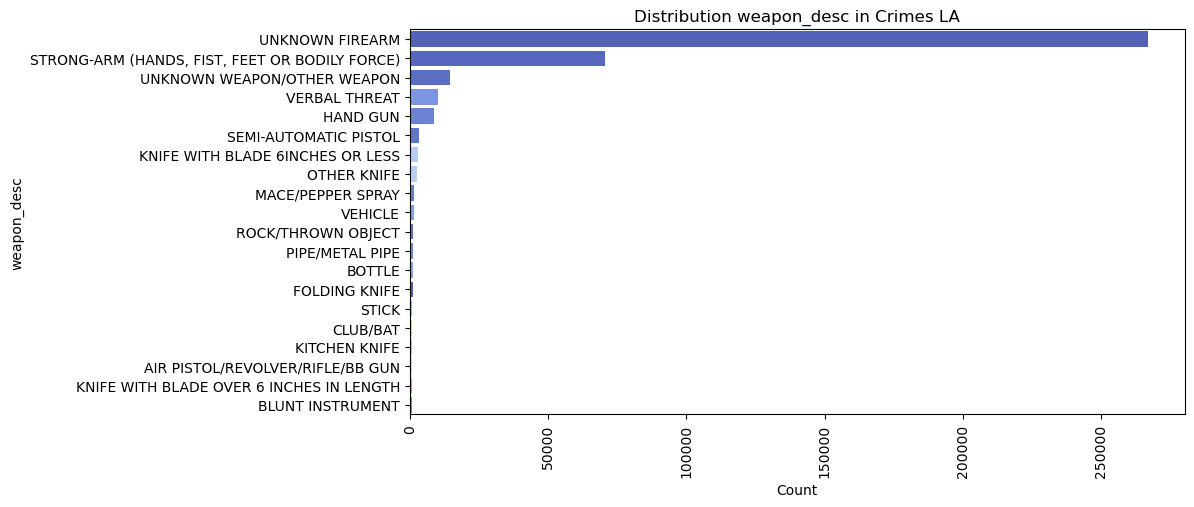

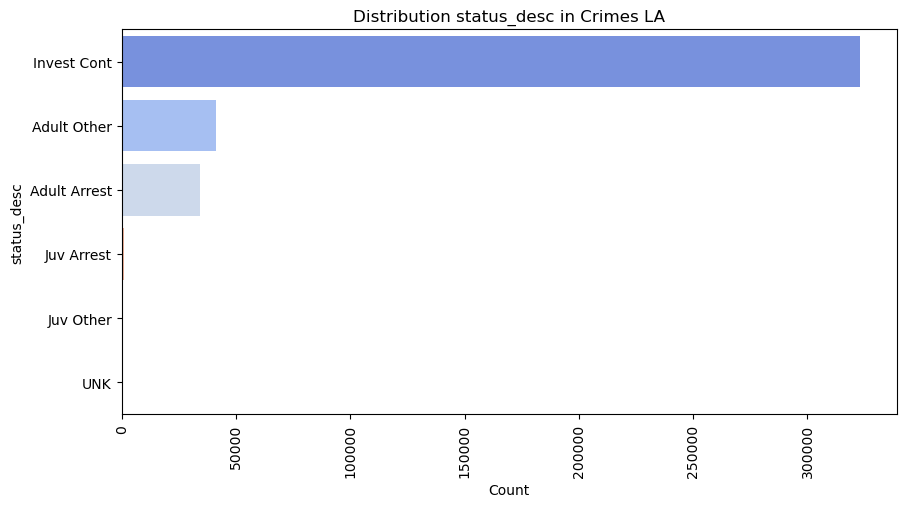

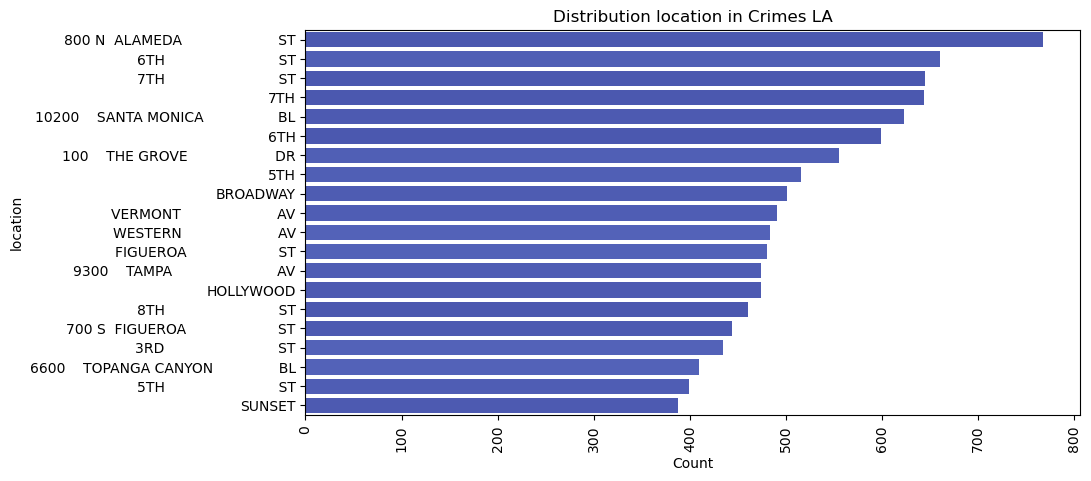

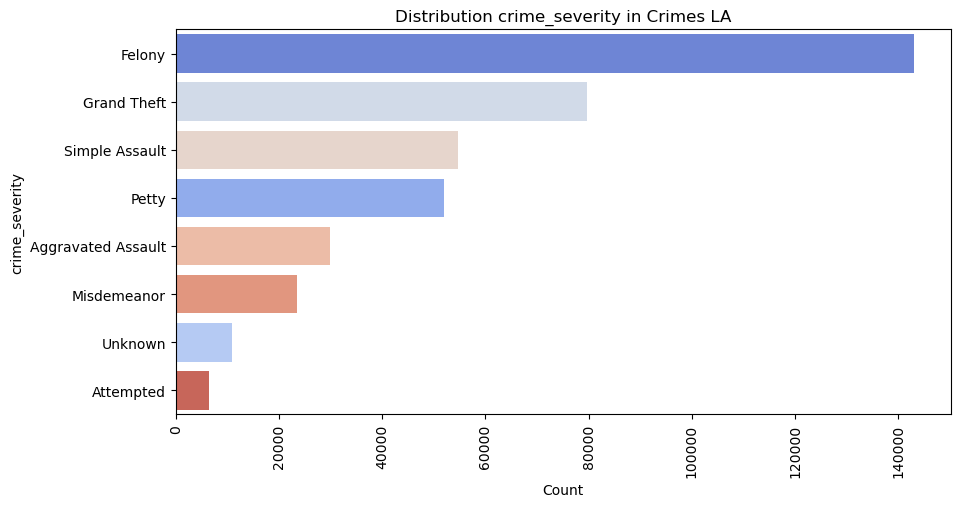

In [84]:
plot_categorical_distribution(df_cleaned, 'Crimes LA')

# **6. Modeling**  

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [123]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400134 entries, 0 to 400145
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   dr_no                400134 non-null  int64          
 1   date_rptd            400134 non-null  datetime64[ns] 
 2   date_occ             400134 non-null  datetime64[ns] 
 3   time_occ             400134 non-null  int64          
 4   area                 400134 non-null  int64          
 5   area_name            400134 non-null  object         
 6   rpt_dist_no          400134 non-null  int64          
 7   crm_cd               400134 non-null  int64          
 8   crm_cd_desc          400134 non-null  object         
 9   vict_age             400134 non-null  int64          
 10  vict_sex             400134 non-null  object         
 11  vict_descent         400134 non-null  object         
 12  premis_cd            400134 non-null  float64        
 13  prem

In [143]:
for col in ['date_rptd', 'date_occ']:
    df_cleaned[col + '_year'] = df_cleaned[col].dt.year
    df_cleaned[col + '_month'] = df_cleaned[col].dt.month
    df_cleaned[col + '_day'] = df_cleaned[col].dt.day
    df_cleaned.drop(columns=[col], inplace=True)

df_cleaned['diff_occ_rptd_seconds'] = df_cleaned['diff_occ_rptd'].dt.total_seconds()
df_cleaned.drop(columns=['diff_occ_rptd'], inplace=True)

In [144]:
ml_df = df_cleaned.drop(["dr_no", "time_occ", "rpt_dist_no", "crm_cd_desc", "crm_cd", "premis_desc", "weapon_used_cd", "premis_cd", "area", "weapon_desc", "location"], axis=1)

ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400134 entries, 0 to 400145
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   area_name              400134 non-null  object 
 1   vict_age               400134 non-null  int64  
 2   vict_sex               400134 non-null  object 
 3   vict_descent           400134 non-null  object 
 4   status_desc            400134 non-null  object 
 5   crm_cd_1               400134 non-null  float64
 6   lat                    400134 non-null  float64
 7   lon                    400134 non-null  float64
 8   Hour                   400134 non-null  int32  
 9   crime_severity         400069 non-null  object 
 10  cleaned_premis_desc    399900 non-null  object 
 11  cleaned_weapon_desc    400134 non-null  object 
 12  date_rptd_year         400134 non-null  int32  
 13  date_rptd_month        400134 non-null  int32  
 14  date_rptd_day          400134 non-null  i

In [105]:
ml_df.head()

,area_name,vict_age,vict_sex,vict_descent,status_desc,crm_cd_1,lat,lon,Hour,crime_severity,cleaned_premis_desc,cleaned_weapon_desc,date_rptd_year,date_rptd_month,date_rptd_day,date_occ_year,date_occ_month,date_occ_day,diff_occ_rptd_seconds
0,77th Street,65,F,X,Invest Cont,210.0,33.9737,-118.2827,11,Felony,Outdoor,Knife,2020,11,2,2020,11,2,0.0
1,Mission,51,M,O,Invest Cont,740.0,34.2467,-118.4479,3,Felony,Food Establishment,Firearm,2020,6,23,2020,6,23,0.0
2,West LA,38,F,W,Invest Cont,420.0,34.0463,-118.4171,15,Petty,Parking,Firearm,2020,2,28,2020,2,28,0.0
3,Van Nuys,64,M,X,Adult Other,901.0,34.1668,-118.4445,17,Unknown,Residential,Firearm,2022,8,3,2022,7,26,691200.0
4,West LA,73,F,W,Invest Cont,662.0,34.0889,-118.5325,15,Grand Theft,Residential,Firearm,2020,12,2,2020,11,27,432000.0


#### Scaling the numeric values in the dataset.



In [145]:
scaler_age = MinMaxScaler()
scaler_lat = MinMaxScaler()
scaler_lon = MinMaxScaler()
scaler_hour = MinMaxScaler()

age_scaled = scaler_age.fit_transform(ml_df['vict_age'].values.reshape(-1, 1))
age_scaled = pd.DataFrame(age_scaled, columns=['scaled_victim_age'])

lat_scaled = scaler_lat.fit_transform(ml_df['lat'].values.reshape(-1, 1))
lat_scaled = pd.DataFrame(lat_scaled, columns=['scaled_latitude'])

lon_scaled = scaler_lon.fit_transform(ml_df['lon'].values.reshape(-1, 1))
lon_scaled = pd.DataFrame(lon_scaled, columns=['scaled_longitude'])

hour_scaled = scaler_hour.fit_transform(ml_df['Hour'].values.reshape(-1, 1))
hour_scaled = pd.DataFrame(hour_scaled, columns=['scaled_hour'])

ml_df = pd.concat([ml_df, age_scaled, lat_scaled, lon_scaled, hour_scaled], axis=1)

ml_df = ml_df.drop(['vict_age', 'crm_cd_1', 'lat', 'lon', 'Hour'], axis=1)

ml_df.head()

,area_name,vict_sex,vict_descent,status_desc,crime_severity,cleaned_premis_desc,cleaned_weapon_desc,date_rptd_year,date_rptd_month,date_rptd_day,date_occ_year,date_occ_month,date_occ_day,diff_occ_rptd_seconds,scaled_victim_age,scaled_latitude,scaled_longitude,scaled_hour
0,77th Street,F,X,Invest Cont,Felony,Outdoor,Knife,2020.0,11.0,2.0,2020.0,11.0,2.0,0.0,0.549180,0.989497,0.003244,0.478261
1,Mission,M,O,Invest Cont,Felony,Food Establishment,Firearm,2020.0,6.0,23.0,2020.0,6.0,23.0,0.0,0.434426,0.997449,0.001851,0.130435
2,West LA,F,W,Invest Cont,Petty,Parking,Firearm,2020.0,2.0,28.0,2020.0,2.0,28.0,0.0,0.327869,0.991612,0.002111,0.652174
3,Van Nuys,M,X,Adult Other,Unknown,Residential,Firearm,2022.0,8.0,3.0,2022.0,7.0,26.0,691200.0,0.540984,0.995121,0.001880,0.739130
4,West LA,F,W,Invest Cont,Grand Theft,Residential,Firearm,2020.0,12.0,2.0,2020.0,11.0,27.0,432000.0,0.614754,0.992853,0.001138,0.652174


#### Encoding Categorical Variables.

In [ ]:
# crime_desc_enc = pd.get_dummies(ml_df['crime_severity'], drop_first=True)

In [146]:
vict_sex_enc = pd.get_dummies(ml_df['vict_sex'], drop_first=True)

In [147]:
vict_eth_enc = pd.get_dummies(ml_df['vict_descent'], drop_first=True)

prem_desc_enc = pd.get_dummies(ml_df['cleaned_premis_desc'], drop_first=True)

wea_desc_enc = pd.get_dummies(ml_df["cleaned_weapon_desc"], drop_first=True)

status_desc_enc = pd.get_dummies(ml_df["status_desc"], drop_first=True)

area_enc = pd.get_dummies(ml_df['area_name'], drop_first=True)

In [148]:
cols = ml_df[["crime_severity", "scaled_hour", "scaled_victim_age", "scaled_latitude", "scaled_longitude"]]
ml_df = pd.concat([cols, hour_scaled, area_enc, vict_sex_enc, vict_eth_enc, prem_desc_enc, wea_desc_enc, status_desc_enc], axis=1)
ml_df.head()

,crime_severity,scaled_hour,scaled_victim_age,scaled_latitude,scaled_longitude,scaled_hour,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,Northeast,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire,M,X,B,C,D,F,G,I,J,K,L,O,P,S,U,V,W,X,Z,Automotive,Beauty,Business,Childcare,Construction,Cyberspace,Delivery Service,Educational,Energy Plant,Entertainment,Financial Institution,Food Establishment,Funeral Services,Gas Station,Government,Healthcare,Infrastructure,Lodging,Mail Services,Manufacturing,Marina,Office,Online,Other,Outdoor,Parking,Public Restroom,Public Services,Public Transportation,Recreation,Recycling,Religious,Residential,Retail,Storage,Street,Technology,Telecommunication,Transportation,Vehicle,Waste Management,Blunt Instrument,Bottle,Chemical,Chemical Spray,Electric Shock,Explosive,Fire,Firearm,Firearm (Toy),Knife,Physical Force,Projectile Weapon,Sharp Object,Strangulation,Substance,Threat,Thrown Object,Unknown,Vehicle,Weapon,Adult Other,Invest Cont,Juv Arrest,Juv Other,UNK
0,Felony,0.478261,0.549180,0.989497,0.003244,0.478261,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,Felony,0.130435,0.434426,0.997449,0.001851,0.130435,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,Petty,0.652174,0.327869,0.991612,0.002111,0.652174,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,Unknown,0.739130,0.540984,0.995121,0.001880,0.739130,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,Grand Theft,0.652174,0.614754,0.992853,0.001138,0.652174,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False

In [149]:
ml_df.isnull().sum()

crime_severity       77
scaled_hour          12
scaled_victim_age    12
scaled_latitude      12
scaled_longitude     12
                     ..
Adult Other           0
Invest Cont           0
Juv Arrest            0
Juv Other             0
UNK                   0
Length: 111, dtype: int64

In [150]:
ml_df.dropna(inplace=True)
ml_df.isnull().sum()

crime_severity       0
scaled_hour          0
scaled_victim_age    0
scaled_latitude      0
scaled_longitude     0
                    ..
Adult Other          0
Invest Cont          0
Juv Arrest           0
Juv Other            0
UNK                  0
Length: 111, dtype: int64

#### Encoding the target variable.

In [151]:
ml_df["crime_sev_enc"] = ml_df["crime_severity"].apply(lambda x: 1 if x == 'Felony' else 0)


In [152]:
ml_df["crime_sev_enc"].value_counts()

crime_sev_enc
0    257086
1    142971
Name: count, dtype: int64

In [153]:
ml_df = ml_df.drop("crime_severity", axis=1)

This Dataset is too large for my machine to handle, so I will be using the following code to reduce the size of the dataset. Since the target variable is a categorical variable, I will first sample the data using stratified sampling technique.

In [154]:
ml_df["crime_sev_enc"].value_counts(normalize=True) * 100

crime_sev_enc
0    64.262343
1    35.737657
Name: proportion, dtype: float64

In [155]:
ml_df_sam = ml_df

## Splitting the dataset and Training the model.

In this stage i will be splitting the dataset into training and testing sets to avoid overfitting, then i will train the model on two of the most common classification algorithms: Logistic Regression and XGBoostClassifier.
First i will simple versions of those models then i will use finer tuned versions of them.

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = ml_df_sam.drop('crime_sev_enc', axis=1)
y = ml_df_sam['crime_sev_enc']



In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### **Addressing Class Imbalance:**

In [158]:
print(ml_df_sam['crime_sev_enc'].value_counts(normalize=True) * 100)

crime_sev_enc
0    64.262343
1    35.737657
Name: proportion, dtype: float64


SMOTE stands for "Synthetic Minority Over-sampling Technique." It is a technique used in machine learning and data preprocessing to address class imbalance in a dataset, particularly in classification problems.

In [159]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/home/midabrow/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


### Logistic Regression with SMOTE:

In [160]:
model_log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)


model_log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model_log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.6741488776683497
              precision    recall  f1-score   support

           0       0.82      0.63      0.71     51418
           1       0.53      0.76      0.62     28594

    accuracy                           0.67     80012
   macro avg       0.68      0.69      0.67     80012
weighted avg       0.72      0.67      0.68     80012



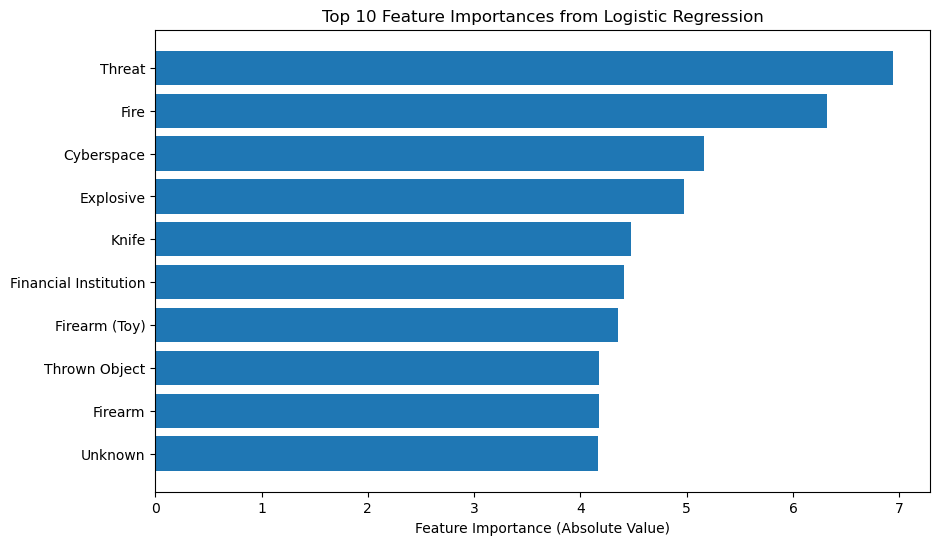

In [161]:
feature_importance = model_log_reg.coef_[0]

# Get the names of your feature columns
feature_names = X_train.columns

# Sort feature importances by absolute value in descending order
sorted_idx = np.argsort(abs(feature_importance))[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot the top N most important features
top_n = 10  # Adjust to the number of features you want to plot
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_feature_importance[:top_n], align='center')
plt.yticks(np.arange(top_n), sorted_feature_names[:top_n])
plt.xlabel('Feature Importance (Absolute Value)')
plt.title('Top {} Feature Importances from Logistic Regression'.format(top_n))
plt.gca().invert_yaxis()
plt.show()